# MinION *pfhrp2* visualization notebook
Susanna Sabin
2022

| Figure Number | Figure Title | Note |
| ------------- | ------------ | ---- |
| Figure 1      |              | Flow chart prepared in draw.io |
| Figure 2 | k13 vs. hrp2 barcode distribution | |
| Figure 3 | Positivity threshold plots for TES samples | |
| Figure 4 | Reference panel repeat types | |
| Figure 5 | PacBio and MinION repeat type patterns | |
| Supplementary Figure 1 | ONT protocol truncated and chimeric reads | Screenshots only | 
| Supplementary Figure 2 | ONT protocol vs. house protocol workflow chart | Flow chart preparted in draw.io |
| Supplementary Figure 3 | Barcoding test read counts | |
| Supplementary Figure 4 | Median coverage of Dd2 on *pfhrp2* vs. Total passing read count per sequencing run | |
| Supplementary Figure 5 | Positivity threshold plots for PacBio and other field validation samples | |
| Supplementary Figure 6 | Cumulative output reads for sequencing run FL1_TES | Screenshot only |

This notebook will generate the figures above (excluding those noted above to be created outside of a jupyter notebook) given the following data structure:
 - manuscript_figures_notebook
     - manuscript_figures.ipynb
     - data
         - all_sequencing_summaries
             - [sequencing_summary_file_name...]
         - all_repeat_reports
             - [repeat_report_file_name...]
     - output

Make sure "all_sequencing_summaries" is a directory and not an archive before running this notebook. Ensure all sequencing summaries are unzipped. 

The output folder will contain the PNG and SVG files produced in this notebook.

## Load required data and libraries


In [1]:
## Load necessary packages

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as n

### Figure 2

Required data:  
- k13 only experiment (FC1_k13 and FC3_k13) sequencing summaries (to calculate individual barcode counts and to calculate range and mean barcode counts overall)
- barcoding test sequencing summary for FC1_bcT
- barcoding test sequencing summary for all runs (to calculate range and mean barcode counts)
- reference panel sequencing summaries (FC1_refpanel 060821)
- mr4 test sequencing summaries (FC1_mr4 and FC2_mr4)

Outcome:  
- Three subplots:
    - subplot a: k13 only vs hrp2 (FC1_bcT and FC1 refpanel) barcode read counts
    - subplot b: k13 only vs hrp2 barcode performance statistics
    - subplot c: k13 only vs hrp2 box plot total performance (# of reads or performance statistic)
    
### Figure 3

__Positivity threshold plots for TES__

Required data:  
- Sequencing summaries from all TES runs
- Mapping coverage statistics

Outcome:  
- Multi-plot with panel for each sequencing run
- Points colored according to control sample / pfhrp2+/pfhrp3+ / pfhrp2-/pfhrp3+ / pfhrp2-/pfhrp3-

### Figure 4

__Reference panel repeat types__

Required data:  
- MR4 FC1, FC2, FL1 and FL2 sample typing reports

Outcome:  
- one stacked "row" per reference strain in a type count plot

### Figure 5

__PacBio and MinION repeat patterns__

Required data:  
- pacval experiment typing reports with pacbio included

Outcome:  
- Full page multiplot figure divided by sample ID
- Might require scaling down

### Supplementary Figure 3

__Barcoding test read counts, k13 vs hrp2__

Required data:  
- k13 only experiment (FC3_k13) sequencing summaries (to calculate individual barcode counts)
- barcoding test sequencing summary for FC1_bcT

Outcome:
- Two panel figure with k13 run barcode read counts and hrp2 barcoding test (FC1) barcode read counts

        
### Supplementary Figure 4

__Median coverage of Dd2 on *pfhrp2* vs. Total passing read count per sequencing run__

Required data:
- Sequencing summaries for TES, pacbio, valdom, and mr4 runs

Outcome:
- Scatter plot with line + ci (lmplot) showing median coverage for Dd2 vs. total passing reads in sequencing run


### Supplementary Figure 5

Positivity thresholds for pacbio and remaining field samples.

Required data:
 - Sequencing summaries for all pacbio sequencing runs
 - Sequencing summaries for all valdom sequencing runs
 - Coverage statistics for all pacbio and valdom samples
 
Outcome:
 - Multi-plot with one panel per sequencing run
 



In [10]:
## Load required sequencing summaries

# k13_only sequencing summaries
fc1_k13 = pd.read_table("data/all_sequencing_summaries/k13_only_fc1_sequencing_summary.txt")     # Load sequencing summary table
fc1_k13_filt = fc1_k13.loc[fc1_k13.passes_filtering, :]                                          # Filter sequencing summary table for passing reads only

fc3_k13 = pd.read_table("data/all_sequencing_summaries/k13_only_fc3_sequencing_summary.txt")     # Load sequencing summary
fc3_k13_filt = fc3_k13.loc[fc3_k13.passes_filtering, :]                                          # Filter sequencing summary table for passing reads only

# barcoding test sequencing summaries
fc1_bcT = pd.read_table("data/all_sequencing_summaries/barcoding_test_fc1_sequencing_summary.txt")
fc1_bcT_filt = fc1_bcT.loc[fc1_bcT.passes_filtering, :]

fc2_bcT = pd.read_table("data/all_sequencing_summaries/barcoding_test_fc2_sequencing_summary.txt")
fc2_bcT_filt = fc2_bcT.loc[fc2_bcT.passes_filtering, :]

fc3_bcT = pd.read_table("data/all_sequencing_summaries/barcoding_test_fc3_sequencing_summary.txt")
fc3_bcT_filt = fc3_bcT.loc[fc3_bcT.passes_filtering, :]

fc4_bcT = pd.read_table("data/all_sequencing_summaries/barcoding_test_fc4_sequencing_summary.txt")
fc4_bcT_filt = fc4_bcT.loc[fc4_bcT.passes_filtering, :]

fc5_bcT = pd.read_table("data/all_sequencing_summaries/barcoding_test_fc5_sequencing_summary.txt")
fc5_bcT_filt = fc5_bcT.loc[fc5_bcT.passes_filtering, :]

fc6_bcT = pd.read_table("data/all_sequencing_summaries/barcoding_test_fc6_sequencing_summary.txt")
fc6_bcT_filt = fc6_bcT.loc[fc6_bcT.passes_filtering, :]

# MR4 reference panel sequencing summaries
fc1_mr4 = pd.read_table("data/all_sequencing_summaries/mr4_fc1_sequencing_summary.txt")
fc1_mr4_filt = fc1_mr4.loc[fc1_mr4.passes_filtering, :]

fc2_mr4 = pd.read_table("data/all_sequencing_summaries/mr4_fc2_sequencing_summary.txt")
fc2_mr4_filt = fc2_mr4.loc[fc2_mr4.passes_filtering, :]

fl1_mr4 = pd.read_table("data/all_sequencing_summaries/mr4_fl1_sequencing_summary.txt")
fl1_mr4_filt = fl1_mr4.loc[fl1_mr4.passes_filtering, :]

fl2_mr4 = pd.read_table("data/all_sequencing_summaries/mr4_fl2_sequencing_summary.txt")
fl2_mr4_filt = fl2_mr4.loc[fl2_mr4.passes_filtering, :]

# reference panel sequencing summary
fc1_ref = pd.read_table("data/all_sequencing_summaries/ref_panel_FC1_sequencing_summary.txt")
fc1_ref_filt = fc1_ref.loc[fc1_ref.passes_filtering, :]

# TES sequencing summaries
fl1_tes = pd.read_table("data/all_sequencing_summaries/tes_fl1_sequencing_summary.txt")
fl1_tes_filt = fl1_tes.loc[fl1_tes.passes_filtering, :]

fl2_tes = pd.read_table("data/all_sequencing_summaries/tes_fl2_sequencing_summary.txt")
fl2_tes_filt = fl2_tes.loc[fl2_tes.passes_filtering, :]

fl3_tes = pd.read_table("data/all_sequencing_summaries/tes_fl3_sequencing_summary.txt")
fl3_tes_filt = fl3_tes.loc[fl3_tes.passes_filtering, :]

fl4_tes = pd.read_table("data/all_sequencing_summaries/tes_fl4_sequencing_summary.txt")
fl4_tes_filt = fl4_tes.loc[fl4_tes.passes_filtering, :]

fl5_tes = pd.read_table("data/all_sequencing_summaries/tes_fl5_sequencing_summary.txt")
fl5_tes_filt = fl5_tes.loc[fl5_tes.passes_filtering, :]

fl6_tes = pd.read_table("data/all_sequencing_summaries/tes_fl6_sequencing_summary.txt")
fl6_tes_filt = fl6_tes.loc[fl6_tes.passes_filtering, :]

# PacBio sample sequencing summaries
fc1_pac = pd.read_table("data/all_sequencing_summaries/pacbio_fc1_sequencing_summary.txt")
fc1_pac_filt = fc1_pac.loc[fc1_pac.passes_filtering, :]

fc2_pac = pd.read_table("data/all_sequencing_summaries/pacbio_fc2_sequencing_summary.txt")
fc2_pac_filt = fc2_pac.loc[fc2_pac.passes_filtering, :]

fc3_pac = pd.read_table("data/all_sequencing_summaries/pacbio_fc3_sequencing_summary.txt")
fc3_pac_filt = fc3_pac.loc[fc3_pac.passes_filtering, :]

fc4_pac = pd.read_table("data/all_sequencing_summaries/pacbio_fc4_sequencing_summary.txt")
fc4_pac_filt = fc4_pac.loc[fc4_pac.passes_filtering, :]

fc5_pac = pd.read_table("data/all_sequencing_summaries/pacbio_fc5_sequencing_summary.txt")
fc5_pac_filt = fc5_pac.loc[fc5_pac.passes_filtering, :]

fl1_pac = pd.read_table("data/all_sequencing_summaries/pacbio_fl1_sequencing_summary.txt")
fl1_pac_filt = fl1_pac.loc[fl1_pac.passes_filtering, :]

fl2_pac = pd.read_table("data/all_sequencing_summaries/pacbio_fl2_sequencing_summary.txt")
fl2_pac_filt = fl2_pac.loc[fl2_pac.passes_filtering, :]

# Field sample sequencing summaries
fc1_field = pd.read_table("data/all_sequencing_summaries/valdom_fc1_sequencing_summary.txt")
fc1_field_filt = fc1_field.loc[fc1_field.passes_filtering, :]

fc2_field = pd.read_table("data/all_sequencing_summaries/valdom_fc2_sequencing_summary.txt")
fc2_field_filt = fc2_field.loc[fc2_field.passes_filtering, :]

fc3_field = pd.read_table("data/all_sequencing_summaries/valdom_fc3_sequencing_summary.txt")
fc3_field_filt = fc3_field.loc[fc3_field.passes_filtering, :]

fc4_field = pd.read_table("data/all_sequencing_summaries/valdom_fc4_sequencing_summary.txt")
fc4_field_filt = fc4_field.loc[fc4_field.passes_filtering, :]

fc5_field = pd.read_table("data/all_sequencing_summaries/valdom_fc5_sequencing_summary.txt")
fc5_field_filt = fc5_field.loc[fc5_field.passes_filtering, :]

fc6_field = pd.read_table("data/all_sequencing_summaries/valdom_fc6_sequencing_summary.txt")
fc6_field_filt = fc6_field.loc[fc6_field.passes_filtering, :]

fc7_field = pd.read_table("data/all_sequencing_summaries/valdom_fc7_sequencing_summary.txt")
fc7_field_filt = fc7_field.loc[fc7_field.passes_filtering, :]

fc8_field = pd.read_table("data/all_sequencing_summaries/valdom_fc8_sequencing_summary.txt")
fc8_field_filt = fc8_field.loc[fc8_field.passes_filtering, :]

fc9_field = pd.read_table("data/all_sequencing_summaries/valdom_fc9_sequencing_summary.txt")
fc9_field_filt = fc9_field.loc[fc9_field.passes_filtering, :]

fl1_field = pd.read_table("data/all_sequencing_summaries/valdom_fl1_sequencing_summary.txt")
fl1_field_filt = fl1_field.loc[fl1_field.passes_filtering, :]

fl2_field = pd.read_table("data/all_sequencing_summaries/valdom_fl2_sequencing_summary.txt")
fl2_field_filt = fl2_field.loc[fl2_field.passes_filtering, :]


In [11]:
## Load and "uncount" required repeat type reports

# MR4 repeat type reports
# FC1 MR4

fc1_mr4_bc01_3D7 = pd.read_table("data/all_repeat_type_reports/mr4_fc1_bc01_3D7_results_long.txt")
fc1_mr4_bc01_3D7_uncount = fc1_mr4_bc01_3D7.iloc[n.repeat(n.arange(len(fc1_mr4_bc01_3D7)),fc1_mr4_bc01_3D7.repeat_type_count),:12] # "Uncount" the typing data such that each occurrence of a type count gets one row
fc1_mr4_bc01_3D7_uncount = fc1_mr4_bc01_3D7_uncount.reset_index()                                                                  # Reset the indices of the table
fc1_mr4_bc01_3D7_uncount['strain'] = ['3D7'] * len(fc1_mr4_bc01_3D7_uncount)                                                       # Add a "strain" column to the dataframe
fc1_mr4_bc01_3D7_uncount['run'] = ['FC1'] * len(fc1_mr4_bc01_3D7_uncount)                                                          # Add a "run" column to the dataframe

fc1_mr4_bc02_FC27 = pd.read_table("data/all_repeat_type_reports/mr4_fc1_bc02_FC27_results_long.txt")
fc1_mr4_bc02_FC27_uncount = fc1_mr4_bc02_FC27.iloc[n.repeat(n.arange(len(fc1_mr4_bc02_FC27)),fc1_mr4_bc02_FC27.repeat_type_count),:12]
fc1_mr4_bc02_FC27_uncount = fc1_mr4_bc02_FC27_uncount.reset_index()
fc1_mr4_bc02_FC27_uncount['strain'] = ['FC27'] * len(fc1_mr4_bc02_FC27_uncount)
fc1_mr4_bc02_FC27_uncount['run'] = ['FC1'] * len(fc1_mr4_bc02_FC27_uncount)

fc1_mr4_bc17_7G8 = pd.read_table("data/all_repeat_type_reports/mr4_fc1_bc17_7G8_results_long.txt")
fc1_mr4_bc17_7G8_uncount = fc1_mr4_bc17_7G8.iloc[n.repeat(n.arange(len(fc1_mr4_bc17_7G8)),fc1_mr4_bc17_7G8.repeat_type_count),:12]
fc1_mr4_bc17_7G8_uncount = fc1_mr4_bc17_7G8_uncount.reset_index()
fc1_mr4_bc17_7G8_uncount['strain'] = ['7G8'] * len(fc1_mr4_bc17_7G8_uncount)
fc1_mr4_bc17_7G8_uncount['run'] = ['FC1'] * len(fc1_mr4_bc17_7G8_uncount)

fc1_mr4_bc18_HB3 = pd.read_table("data/all_repeat_type_reports/mr4_fc1_bc18_HB3_results_long.txt")
fc1_mr4_bc18_HB3_uncount = fc1_mr4_bc18_HB3.iloc[n.repeat(n.arange(len(fc1_mr4_bc18_HB3)),fc1_mr4_bc18_HB3.repeat_type_count),:12]
fc1_mr4_bc18_HB3_uncount = fc1_mr4_bc18_HB3_uncount.reset_index()
fc1_mr4_bc18_HB3_uncount['strain'] = ['HB3'] * len(fc1_mr4_bc18_HB3_uncount)
fc1_mr4_bc18_HB3_uncount['run'] = ['FC1'] * len(fc1_mr4_bc18_HB3_uncount)

# FC2 MR4

fc2_mr4_bc01_HB3 = pd.read_table("data/all_repeat_type_reports/mr4_fc2_bc01_HB3_results_long.txt")
fc2_mr4_bc01_HB3_uncount = fc2_mr4_bc01_HB3.iloc[n.repeat(n.arange(len(fc2_mr4_bc01_HB3)),fc2_mr4_bc01_HB3.repeat_type_count),:12]
fc2_mr4_bc01_HB3_uncount = fc2_mr4_bc01_HB3_uncount.reset_index()
fc2_mr4_bc01_HB3_uncount['strain'] = ['HB3'] * len(fc2_mr4_bc01_HB3_uncount)
fc2_mr4_bc01_HB3_uncount['run'] = ['FC2'] * len(fc2_mr4_bc01_HB3_uncount)

fc2_mr4_bc12_7G8 = pd.read_table("data/all_repeat_type_reports/mr4_fc2_bc12_7G8_results_long.txt")
fc2_mr4_bc12_7G8_uncount = fc2_mr4_bc12_7G8.iloc[n.repeat(n.arange(len(fc2_mr4_bc12_7G8)),fc2_mr4_bc12_7G8.repeat_type_count),:12]
fc2_mr4_bc12_7G8_uncount = fc2_mr4_bc12_7G8_uncount.reset_index()
fc2_mr4_bc12_7G8_uncount['strain'] = ['7G8'] * len(fc2_mr4_bc12_7G8_uncount)
fc2_mr4_bc12_7G8_uncount['run'] = ['FC2'] * len(fc2_mr4_bc12_7G8_uncount)

fc2_mr4_bc17_3D7 = pd.read_table("data/all_repeat_type_reports/mr4_fc2_bc17_3D7_results_long.txt")
fc2_mr4_bc17_3D7_uncount = fc2_mr4_bc17_3D7.iloc[n.repeat(n.arange(len(fc2_mr4_bc17_3D7)),fc2_mr4_bc17_3D7.repeat_type_count),:12]
fc2_mr4_bc17_3D7_uncount = fc2_mr4_bc17_3D7_uncount.reset_index()
fc2_mr4_bc17_3D7_uncount['strain'] = ['3D7'] * len(fc2_mr4_bc17_3D7_uncount)
fc2_mr4_bc17_3D7_uncount['run'] = ['FC2'] * len(fc2_mr4_bc17_3D7_uncount)

fc2_mr4_bc18_FC27 = pd.read_table("data/all_repeat_type_reports/mr4_fc2_bc18_FC27_results_long.txt")
fc2_mr4_bc18_FC27_uncount = fc2_mr4_bc18_FC27.iloc[n.repeat(n.arange(len(fc2_mr4_bc18_FC27)),fc2_mr4_bc18_FC27.repeat_type_count),:12]
fc2_mr4_bc18_FC27_uncount = fc2_mr4_bc18_FC27_uncount.reset_index()
fc2_mr4_bc18_FC27_uncount['strain'] = ['FC27'] * len(fc2_mr4_bc18_FC27_uncount)
fc2_mr4_bc18_FC27_uncount['run'] = ['FC2'] * len(fc2_mr4_bc18_FC27_uncount)

# FL1 MR4
fl1_mr4_bc01_FC27 = pd.read_table("data/all_repeat_type_reports/mr4_fl1_bc01_FC27_results_long.txt")
fl1_mr4_bc01_FC27_uncount = fl1_mr4_bc01_FC27.iloc[n.repeat(n.arange(len(fl1_mr4_bc01_FC27)),fl1_mr4_bc01_FC27.repeat_type_count),:12]
fl1_mr4_bc01_FC27_uncount = fl1_mr4_bc01_FC27_uncount.reset_index()
fl1_mr4_bc01_FC27_uncount['strain'] = ['FC27'] * len(fl1_mr4_bc01_FC27_uncount)
fl1_mr4_bc01_FC27_uncount['run'] = ['FL1'] * len(fl1_mr4_bc01_FC27_uncount)

fl1_mr4_bc02_7G8 = pd.read_table("data/all_repeat_type_reports/mr4_fl1_bc02_7G8_results_long.txt")
fl1_mr4_bc02_7G8_uncount = fl1_mr4_bc02_7G8.iloc[n.repeat(n.arange(len(fl1_mr4_bc02_7G8)),fl1_mr4_bc02_7G8.repeat_type_count),:12]
fl1_mr4_bc02_7G8_uncount = fl1_mr4_bc02_7G8_uncount.reset_index()
fl1_mr4_bc02_7G8_uncount['strain'] = ['7G8'] * len(fl1_mr4_bc02_7G8_uncount)
fl1_mr4_bc02_7G8_uncount['run'] = ['FL1'] * len(fl1_mr4_bc02_7G8_uncount)

fl1_mr4_bc12_3D7 = pd.read_table("data/all_repeat_type_reports/mr4_fl1_bc12_3D7_results_long.txt")
fl1_mr4_bc12_3D7_uncount = fl1_mr4_bc12_3D7.iloc[n.repeat(n.arange(len(fl1_mr4_bc12_3D7)),fl1_mr4_bc12_3D7.repeat_type_count),:12]
fl1_mr4_bc12_3D7_uncount = fl1_mr4_bc12_3D7_uncount.reset_index()
fl1_mr4_bc12_3D7_uncount['strain'] = ['3D7'] * len(fl1_mr4_bc12_3D7_uncount)
fl1_mr4_bc12_3D7_uncount['run'] = ['FL1'] * len(fl1_mr4_bc12_3D7_uncount)

fl1_mr4_bc17_HB3 = pd.read_table("data/all_repeat_type_reports/mr4_fl1_bc17_HB3_results_long.txt")
fl1_mr4_bc17_HB3_uncount = fl1_mr4_bc17_HB3.iloc[n.repeat(n.arange(len(fl1_mr4_bc17_HB3)),fl1_mr4_bc17_HB3.repeat_type_count),:12]
fl1_mr4_bc17_HB3_uncount = fl1_mr4_bc17_HB3_uncount.reset_index()
fl1_mr4_bc17_HB3_uncount['strain'] = ['HB3'] * len(fl1_mr4_bc17_HB3_uncount)
fl1_mr4_bc17_HB3_uncount['run'] = ['FL1'] * len(fl1_mr4_bc17_HB3_uncount)

# FL2 MR4
fl2_mr4_bc02_3D7 = pd.read_table("data/all_repeat_type_reports/mr4_fl2_bc02_3D7_results_long.txt")
fl2_mr4_bc02_3D7_uncount = fl2_mr4_bc02_3D7.iloc[n.repeat(n.arange(len(fl2_mr4_bc02_3D7)),fl2_mr4_bc02_3D7.repeat_type_count),:12]
fl2_mr4_bc02_3D7_uncount = fl2_mr4_bc02_3D7_uncount.reset_index()
fl2_mr4_bc02_3D7_uncount['strain'] = ['3D7'] * len(fl2_mr4_bc02_3D7_uncount)
fl2_mr4_bc02_3D7_uncount['run'] = ['FL2'] * len(fl2_mr4_bc02_3D7_uncount)

fl2_mr4_bc12_HB3 = pd.read_table("data/all_repeat_type_reports/mr4_fl2_bc12_HB3_results_long.txt")
fl2_mr4_bc12_HB3_uncount = fl2_mr4_bc12_HB3.iloc[n.repeat(n.arange(len(fl2_mr4_bc12_HB3)),fl2_mr4_bc12_HB3.repeat_type_count),:12]
fl2_mr4_bc12_HB3_uncount = fl2_mr4_bc12_HB3_uncount.reset_index()
fl2_mr4_bc12_HB3_uncount['strain'] = ['HB3'] * len(fl2_mr4_bc12_HB3_uncount)
fl2_mr4_bc12_HB3_uncount['run'] = ['FL2'] * len(fl2_mr4_bc12_HB3_uncount)

fl2_mr4_bc17_FC27 = pd.read_table("data/all_repeat_type_reports/mr4_fl2_bc17_FC27_results_long.txt")
fl2_mr4_bc17_FC27_uncount = fl2_mr4_bc17_FC27.iloc[n.repeat(n.arange(len(fl2_mr4_bc17_FC27)),fl2_mr4_bc17_FC27.repeat_type_count),:12]
fl2_mr4_bc17_FC27_uncount = fl2_mr4_bc17_FC27_uncount.reset_index()
fl2_mr4_bc17_FC27_uncount['strain'] = ['FC27'] * len(fl2_mr4_bc17_FC27_uncount)
fl2_mr4_bc17_FC27_uncount['run'] = ['FL2'] * len(fl2_mr4_bc17_FC27_uncount)

fl2_mr4_bc18_7G8 = pd.read_table("data/all_repeat_type_reports/mr4_fl2_bc18_7G8_results_long.txt")
fl2_mr4_bc18_7G8_uncount = fl2_mr4_bc18_7G8.iloc[n.repeat(n.arange(len(fl2_mr4_bc18_7G8)),fl2_mr4_bc18_7G8.repeat_type_count),:12]
fl2_mr4_bc18_7G8_uncount = fl2_mr4_bc18_7G8_uncount.reset_index()
fl2_mr4_bc18_7G8_uncount['strain'] = ['7G8'] * len(fl2_mr4_bc18_7G8_uncount)
fl2_mr4_bc18_7G8_uncount['run'] = ['FL2'] * len(fl2_mr4_bc18_7G8_uncount)


In [2]:
## Load data
# PacBio repeat type reports

fc2_pac_bc02_H038 = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc02_H038_results_long.txt")
fc2_pac_bc02_H038_uncount = fc2_pac_bc02_H038.iloc[n.repeat(n.arange(len(fc2_pac_bc02_H038)), fc2_pac_bc02_H038.repeat_type_count),:12]
fc2_pac_bc02_H038_uncount = fc2_pac_bc02_H038_uncount.reset_index()

fc2_pac_bc02_H038_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc02_H038_pb_results_long.txt")
fc2_pac_bc02_H038_pb_uncount = fc2_pac_bc02_H038_pb.iloc[n.repeat(n.arange(len(fc2_pac_bc02_H038_pb)), fc2_pac_bc02_H038_pb.repeat_type_count),:12]
fc2_pac_bc02_H038_pb_uncount = fc2_pac_bc02_H038_pb_uncount.reset_index()

fc2_pac_bc12_H091 = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc12_H091_results_long.txt")
fc2_pac_bc12_H091_uncount = fc2_pac_bc12_H091.iloc[n.repeat(n.arange(len(fc2_pac_bc12_H091)),fc2_pac_bc12_H091.repeat_type_count),:12]
fc2_pac_bc12_H091_uncount = fc2_pac_bc12_H091_uncount.reset_index()

fc2_pac_bc12_H091_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc12_H091_pb_results_long.txt")
fc2_pac_bc12_H091_pb_uncount = fc2_pac_bc12_H091_pb.iloc[n.repeat(n.arange(len(fc2_pac_bc12_H091_pb)),fc2_pac_bc12_H091_pb.repeat_type_count),:12]
fc2_pac_bc12_H091_pb_uncount = fc2_pac_bc12_H091_pb_uncount.reset_index()

fc2_pac_bc13_H478 = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc13_H478_results_long.txt")
fc2_pac_bc13_H478_uncount = fc2_pac_bc13_H478.iloc[n.repeat(n.arange(len(fc2_pac_bc13_H478)),fc2_pac_bc13_H478.repeat_type_count),:12]
fc2_pac_bc13_H478_uncount = fc2_pac_bc13_H478_uncount.reset_index()

fc2_pac_bc13_H478_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc13_H478_pb_results_long.txt")
fc2_pac_bc13_H478_pb_uncount = fc2_pac_bc13_H478_pb.iloc[n.repeat(n.arange(len(fc2_pac_bc13_H478_pb)),fc2_pac_bc13_H478_pb.repeat_type_count),:12]
fc2_pac_bc13_H478_pb_uncount = fc2_pac_bc13_H478_pb_uncount.reset_index()

fc2_pac_bc30_U400 = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc30_U400_results_long.txt")
fc2_pac_bc30_U400_uncount = fc2_pac_bc30_U400.iloc[n.repeat(n.arange(len(fc2_pac_bc30_U400)),fc2_pac_bc30_U400.repeat_type_count),:12]
fc2_pac_bc30_U400_uncount = fc2_pac_bc30_U400_uncount.reset_index()

fc2_pac_bc30_U400_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc30_U400_pb_results_long.txt")
fc2_pac_bc30_U400_pb_uncount = fc2_pac_bc30_U400_pb.iloc[n.repeat(n.arange(len(fc2_pac_bc30_U400_pb)),fc2_pac_bc30_U400_pb.repeat_type_count),:12]
fc2_pac_bc30_U400_pb_uncount = fc2_pac_bc30_U400_pb_uncount.reset_index()

fc2_pac_bc49_U097 = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc49_U097_results_long.txt")
fc2_pac_bc49_U097_uncount = fc2_pac_bc49_U097.iloc[n.repeat(n.arange(len(fc2_pac_bc49_U097)),fc2_pac_bc49_U097.repeat_type_count),:12]
fc2_pac_bc49_U097_uncount = fc2_pac_bc49_U097_uncount.reset_index()

fc2_pac_bc49_U097_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc2_bc49_U097_pb_results_long.txt")
fc2_pac_bc49_U097_pb_uncount = fc2_pac_bc49_U097_pb.iloc[n.repeat(n.arange(len(fc2_pac_bc49_U097_pb)),fc2_pac_bc49_U097_pb.repeat_type_count),:12]
fc2_pac_bc49_U097_pb_uncount = fc2_pac_bc49_U097_pb_uncount.reset_index()

# FC3 PacBio
fc3_pac_bc01_5812 = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc01_5812_results_long.txt")
fc3_pac_bc01_5812_uncount = fc3_pac_bc01_5812.iloc[n.repeat(n.arange(len(fc3_pac_bc01_5812)),fc3_pac_bc01_5812.repeat_type_count),:12]
fc3_pac_bc01_5812_uncount = fc3_pac_bc01_5812_uncount.reset_index()

fc3_pac_bc01_5812_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc01_5812_pb_results_long.txt")
fc3_pac_bc01_5812_pb_uncount = fc3_pac_bc01_5812_pb.iloc[n.repeat(n.arange(len(fc3_pac_bc01_5812_pb)),fc3_pac_bc01_5812_pb.repeat_type_count),:12]
fc3_pac_bc01_5812_pb_uncount = fc3_pac_bc01_5812_pb_uncount.reset_index()

fc3_pac_bc02_5817 = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc02_5817_results_long.txt")
fc3_pac_bc02_5817_uncount = fc3_pac_bc02_5817.iloc[n.repeat(n.arange(len(fc3_pac_bc02_5817)),fc3_pac_bc02_5817.repeat_type_count),:12]
fc3_pac_bc02_5817_uncount = fc3_pac_bc02_5817_uncount.reset_index()

fc3_pac_bc02_5817_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc02_5817_pb_results_long.txt")
fc3_pac_bc02_5817_pb_uncount = fc3_pac_bc02_5817_pb.iloc[n.repeat(n.arange(len(fc3_pac_bc02_5817_pb)),fc3_pac_bc02_5817_pb.repeat_type_count),:12]
fc3_pac_bc02_5817_pb_uncount = fc3_pac_bc02_5817_pb_uncount.reset_index()

fc3_pac_bc12_5694 = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc12_5694_results_long.txt")
fc3_pac_bc12_5694_uncount = fc3_pac_bc12_5694.iloc[n.repeat(n.arange(len(fc3_pac_bc12_5694)),fc3_pac_bc12_5694.repeat_type_count),:12]
fc3_pac_bc12_5694_uncount = fc3_pac_bc12_5694_uncount.reset_index()

fc3_pac_bc12_5694_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc12_5694_pb_results_long.txt")
fc3_pac_bc12_5694_pb_uncount = fc3_pac_bc12_5694_pb.iloc[n.repeat(n.arange(len(fc3_pac_bc12_5694_pb)),fc3_pac_bc12_5694_pb.repeat_type_count),:12]
fc3_pac_bc12_5694_pb_uncount = fc3_pac_bc12_5694_pb_uncount.reset_index()

fc3_pac_bc17_5701 = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc17_5701_results_long.txt")
fc3_pac_bc17_5701_uncount = fc3_pac_bc17_5701.iloc[n.repeat(n.arange(len(fc3_pac_bc17_5701)),fc3_pac_bc17_5701.repeat_type_count),:12]
fc3_pac_bc17_5701_uncount = fc3_pac_bc17_5701_uncount.reset_index()

fc3_pac_bc17_5701_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc17_5701_pb_results_long.txt")
fc3_pac_bc17_5701_pb_uncount = fc3_pac_bc17_5701_pb.iloc[n.repeat(n.arange(len(fc3_pac_bc17_5701_pb)),fc3_pac_bc17_5701_pb.repeat_type_count),:12]
fc3_pac_bc17_5701_pb_uncount = fc3_pac_bc17_5701_pb_uncount.reset_index()

fc3_pac_bc18_5795 = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc18_5795_results_long.txt")
fc3_pac_bc18_5795_uncount = fc3_pac_bc18_5795.iloc[n.repeat(n.arange(len(fc3_pac_bc18_5795)),fc3_pac_bc18_5795.repeat_type_count),:12]
fc3_pac_bc18_5795_uncount = fc3_pac_bc18_5795_uncount.reset_index()

fc3_pac_bc18_5795_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc18_5795_pb_results_long.txt")
fc3_pac_bc18_5795_pb_uncount = fc3_pac_bc18_5795_pb.iloc[n.repeat(n.arange(len(fc3_pac_bc18_5795_pb)),fc3_pac_bc18_5795_pb.repeat_type_count),:12]
fc3_pac_bc18_5794_pb_uncount = fc3_pac_bc18_5795_pb_uncount.reset_index()

fc3_pac_bc52_U830 = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc52_U830_results_long.txt")
fc3_pac_bc52_U830_uncount = fc3_pac_bc52_U830.iloc[n.repeat(n.arange(len(fc3_pac_bc52_U830)),fc3_pac_bc52_U830.repeat_type_count),:12]
fc3_pac_bc52_U830_uncount = fc3_pac_bc52_U830_uncount.reset_index()

fc3_pac_bc52_U830_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc52_U830_pb_results_long.txt")
fc3_pac_bc52_U830_pb_uncount = fc3_pac_bc52_U830_pb.iloc[n.repeat(n.arange(len(fc3_pac_bc52_U830_pb)),fc3_pac_bc52_U830_pb.repeat_type_count),:12]
fc3_pac_bc52_U830_pb_uncount = fc3_pac_bc52_U830_pb_uncount.reset_index()

fc3_pac_bc60_5809 = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc60_5809_results_long.txt")
fc3_pac_bc60_5809_uncount = fc3_pac_bc60_5809.iloc[n.repeat(n.arange(len(fc3_pac_bc60_5809)),fc3_pac_bc60_5809.repeat_type_count),:12]
fc3_pac_bc60_5809_uncount = fc3_pac_bc60_5809_uncount.reset_index()

fc3_pac_bc60_5809_pb = pd.read_table("data/all_repeat_type_reports/pacbio_fc3_bc60_5809_pb_results_long.txt")
fc3_pac_bc60_5809_pb_uncount = fc3_pac_bc60_5809_pb.iloc[n.repeat(n.arange(len(fc3_pac_bc60_5809_pb)),fc3_pac_bc60_5809_pb.repeat_type_count),:12]
fc3_pac_bc60_5809_pb_uncount = fc3_pac_bc60_5809_pb_uncount.reset_index()

# FC4 PacBio
#fc4_pac_bc01_5718 = pd.read_table("data/all_repeat_type_reports/pacbio_fc4_bc01_5718_results_long.txt")

#fc4_pac_bc02_5830 = pd.read_table("data/all_repeat_type_reports/pacbio_fc4_bc02_5830_results_long.txt")

#fc4_pac_bc17_5802 = pd.read_table("data/all_repeat_type_reports/pacbio_fc4_bc17_5802_results_long.txt")

#fc4_pac_bc18_5884 = pd.read_table("data/all_repeat_type_reports/pacbio_fc4_bc18_5884_results_long.txt")

#fc4_pac_bc30_5761 = pd.read_table("data/all_repeat_type_reports/pacbio_fc4_bc30_5761_results_long.txt")

#fc4_pac_bc49_5690 = pd.read_table("data/all_repeat_type_reports/pacbio_fc4_bc49_5690_results_long.txt")

#fc4_pac_bc52_5721 = pd.read_table("data/all_repeat_type_reports/pacbio_fc4_bc52_5721_results_long.txt")

#fc4_pac_bc60_5881 = pd.read_table("data/all_repeat_type_reports/pacbio_fc4_bc60_5881_results_long.txt")

# FC5 PacBio

#fc5_pac_bc01_33d = pd.read_table("data/all_repeat_type_reports/pacbio_fc5_bc01_33d_results_long.txt")

#fc5_pac_bc12_5776 = pd.read_table("data/all_repeat_type_reports/pacbio_fc5_bc12_5776_results_long.txt")

#fc5_pac_bc13_5873 = pd.read_table("data/all_repeat_type_reports/pacbio_fc5_bc13_5873_results_long.txt")

#fc5_pac_bc17_27d = pd.read_table("data/all_repeat_type_reports/pacbio_fc5_bc17_27d_results_long.txt")

#fc5_pac_bc30_9d = pd.read_table("data/all_repeat_type_reports/pacbio_fc5_bc30_9d_results_long.txt")

#fc5_pac_bc49_8d = pd.read_table("data/all_repeat_type_reports/pacbio_fc5_bc49_8d_results_long.txt")

#fc5_pac_bc52_25d = pd.read_table("data/all_repeat_type_reports/pacbio_fc5_bc52_25d_results_long.txt")

#fc5_pac_bc60_26d = pd.read_table("data/all_repeat_type_reports/pacbio_fc5_bc60_26d_results_long.txt")

# FL1 PacBio

#fl1_pac_bc18_U414 = pd.read_table("data/all_repeat_type_reports/pacbio_fl1_bc18_U414_results_long.txt")

# FL2 PacBio

#fl2_pac_bc02_86d = pd.read_table("data/all_repeat_type_reports/pacbio_fl2_bc02_86d_results_long.txt")

#fl2_pac_bc12_89d = pd.read_table("data/all_repeat_type_reports/pacbio_fl2_bc12_89d_results_long.txt")



## Generate figures

### Figure 2

In [4]:
## Set universal seaborn style parameters

sns.set_style("whitegrid")   # Set a white grid style for seaborn plot
sns.set_palette("colorblind")   # Set color scheme to "colorblind" palette
sns.color_palette("colorblind")   # Print a preview of the "colorblind" palette


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [69]:
## Reorganize data into a dataframe that will serve this figure 

unclassified = ["unclassified"]     # Write "unclassified" to its own list. This is helpful when defining "total_class" and there's probably a better way to do it in the "total_class" code.

## FC1 k13 dataframe

# Write the number of filtered reads assigned to the *correct* barcode to a variable, with one variable per barcode.
# To do this, you must know which barcodes were used.
bc01 = len(fc1_k13_filt[fc1_k13_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.
bc02 = len(fc1_k13_filt[fc1_k13_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc07 = len(fc1_k13_filt[fc1_k13_filt.barcode_arrangement == "barcode07"])   # Write the length of the list of dataframe entries which match "barcode07" in the "barcode_arrangement" column.
bc09 = len(fc1_k13_filt[fc1_k13_filt.barcode_arrangement == "barcode09"])   # Write the length of the list of dataframe entries which match "barcode09" in the "barcode_arrangement" column.
bc10 = len(fc1_k13_filt[fc1_k13_filt.barcode_arrangement == "barcode10"])   # Write the length of the list of dataframe entries which match "barcode10" in the "barcode_arrangement" column.

# Write sequencing run-wide statistics to variables.
unclass = len(fc1_k13_filt[fc1_k13_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc1_k13_filt[~fc1_k13_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc01 + bc02 + bc07 + bc09 + bc10   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc1_k13_filt)   # Write the length of the dataframe. This will include all passing reads.

# Gather information into a single data frame.
fc1_k13_tab = pd.DataFrame({'barcode':['barcode01', 'barcode02', 'barcode07', 'barcode09', 'barcode10'], # Vector contains strings representing each true barcode.
                           'sample_ID':['7G8', '3D7', 'HB3', 'FC27', 'Dd2'],   # Vector contains strings representing each sample ID. You must have this information ready.
                           'run':['FC1_k13'] * 5,   # Vector contains strings representing the sequencing run name.
                           'target':['k13'] * 5,   # Vector contains strings representing the targeted gene in the experiment.
                           'barcode_read_count':[bc01, bc02, bc07, bc09, bc10],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                           'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                           'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                           'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                           'total_reads':[total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.



# FC3_k13

bc01 = len(fc3_k13_filt[fc3_k13_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.
bc02 = len(fc3_k13_filt[fc3_k13_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc07 = len(fc3_k13_filt[fc3_k13_filt.barcode_arrangement == "barcode07"])   # Write the length of the list of dataframe entries which match "barcode07" in the "barcode_arrangement" column.
bc09 = len(fc3_k13_filt[fc3_k13_filt.barcode_arrangement == "barcode09"])   # Write the length of the list of dataframe entries which match "barcode09" in the "barcode_arrangement" column.
bc10 = len(fc3_k13_filt[fc3_k13_filt.barcode_arrangement == "barcode10"])   # Write the length of the list of dataframe entries which match "barcode10" in the "barcode_arrangement" column.

unclass = len(fc3_k13_filt[fc3_k13_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc3_k13_filt[~fc3_k13_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc01 + bc02 + bc07 + bc09 + bc10   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc3_k13_filt)   # Write the length of the dataframe. This will include all passing reads.

fc3_k13_tab = pd.DataFrame({'barcode':['barcode01', 'barcode02', 'barcode07', 'barcode09', 'barcode10'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 5,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC3_k13'] * 5,   # Vector contains strings representing the sequencing run name.
                       'target':['k13'] * 5,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc01, bc02, bc07, bc09, bc10],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.

# FC1_bcT

bc01 = len(fc1_bcT_filt[fc1_bcT_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.
bc02 = len(fc1_bcT_filt[fc1_bcT_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc07 = len(fc1_bcT_filt[fc1_bcT_filt.barcode_arrangement == "barcode07"])   # Write the length of the list of dataframe entries which match "barcode07" in the "barcode_arrangement" column.
bc09 = len(fc1_bcT_filt[fc1_bcT_filt.barcode_arrangement == "barcode09"])   # Write the length of the list of dataframe entries which match "barcode09" in the "barcode_arrangement" column.
bc10 = len(fc1_bcT_filt[fc1_bcT_filt.barcode_arrangement == "barcode10"])   # Write the length of the list of dataframe entries which match "barcode10" in the "barcode_arrangement" column.

unclass = len(fc1_bcT_filt[fc1_bcT_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc1_bcT_filt[~fc1_bcT_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc01 + bc02 + bc07 + bc09 + bc10   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc1_bcT_filt)   # Write the length of the dataframe. This will include all passing reads.

fc1_bcT_tab = pd.DataFrame({'barcode':['barcode01', 'barcode02', 'barcode07', 'barcode09', 'barcode10'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 5,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC1_bcT'] * 5,   # Vector contains strings representing the sequencing run name.
                       'target':['hrp2'] * 5,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc01, bc02, bc07, bc09, bc10],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.

# FC2_bcT

bc12 = len(fc2_bcT_filt[fc2_bcT_filt.barcode_arrangement == "barcode12"])   # Write the length of the list of dataframe entries which match "barcode12" in the "barcode_arrangement" column.
bc13 = len(fc2_bcT_filt[fc2_bcT_filt.barcode_arrangement == "barcode13"])   # Write the length of the list of dataframe entries which match "barcode13" in the "barcode_arrangement" column.
bc15 = len(fc2_bcT_filt[fc2_bcT_filt.barcode_arrangement == "barcode15"])   # Write the length of the list of dataframe entries which match "barcode15" in the "barcode_arrangement" column.
bc17 = len(fc2_bcT_filt[fc2_bcT_filt.barcode_arrangement == "barcode17"])   # Write the length of the list of dataframe entries which match "barcode17" in the "barcode_arrangement" column.
bc18 = len(fc2_bcT_filt[fc2_bcT_filt.barcode_arrangement == "barcode18"])   # Write the length of the list of dataframe entries which match "barcode18" in the "barcode_arrangement" column.

unclass = len(fc2_bcT_filt[fc2_bcT_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc2_bcT_filt[~fc2_bcT_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc12 + bc13 + bc15 + bc17 + bc18   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc2_bcT_filt)   # Write the length of the dataframe. This will include all passing reads.

fc2_bcT_tab = pd.DataFrame({'barcode':['barcode12', 'barcode13', 'barcode15', 'barcode17', 'barcode18'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 5,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC2_bcT'] * 5,   # Vector contains strings representing the sequencing run name.
                       'target':['hrp2'] * 5,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc12, bc13, bc15, bc17, bc18],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.


# FC3_bcT

bc20 = len(fc3_bcT_filt[fc3_bcT_filt.barcode_arrangement == "barcode20"])   # Write the length of the list of dataframe entries which match "barcode20" in the "barcode_arrangement" column.
bc21 = len(fc3_bcT_filt[fc3_bcT_filt.barcode_arrangement == "barcode21"])   # Write the length of the list of dataframe entries which match "barcode21" in the "barcode_arrangement" column.
bc27 = len(fc3_bcT_filt[fc3_bcT_filt.barcode_arrangement == "barcode27"])   # Write the length of the list of dataframe entries which match "barcode27" in the "barcode_arrangement" column.
bc28 = len(fc3_bcT_filt[fc3_bcT_filt.barcode_arrangement == "barcode28"])   # Write the length of the list of dataframe entries which match "barcode28" in the "barcode_arrangement" column.
bc29 = len(fc3_bcT_filt[fc3_bcT_filt.barcode_arrangement == "barcode29"])   # Write the length of the list of dataframe entries which match "barcode29" in the "barcode_arrangement" column.

unclass = len(fc3_bcT_filt[fc3_bcT_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc3_bcT_filt[~fc3_bcT_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc20 + bc21 + bc27 + bc28 + bc29   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc3_bcT_filt)   # Write the length of the dataframe. This will include all passing reads.

fc3_bcT_tab = pd.DataFrame({'barcode':['barcode20', 'barcode21', 'barcode27', 'barcode28', 'barcode29'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 5,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC3_bcT'] * 5,   # Vector contains strings representing the sequencing run name.
                       'target':['hrp2'] * 5,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc20, bc21, bc27, bc28, bc29],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.

# FC4_bcT

bc30 = len(fc4_bcT_filt[fc4_bcT_filt.barcode_arrangement == "barcode30"])   # Write the length of the list of dataframe entries which match "barcode30" in the "barcode_arrangement" column.
bc32 = len(fc4_bcT_filt[fc4_bcT_filt.barcode_arrangement == "barcode32"])   # Write the length of the list of dataframe entries which match "barcode32" in the "barcode_arrangement" column.
bc34 = len(fc4_bcT_filt[fc4_bcT_filt.barcode_arrangement == "barcode34"])   # Write the length of the list of dataframe entries which match "barcode34" in the "barcode_arrangement" column.
bc38 = len(fc4_bcT_filt[fc4_bcT_filt.barcode_arrangement == "barcode38"])   # Write the length of the list of dataframe entries which match "barcode38" in the "barcode_arrangement" column.
bc39 = len(fc4_bcT_filt[fc4_bcT_filt.barcode_arrangement == "barcode39"])   # Write the length of the list of dataframe entries which match "barcode39" in the "barcode_arrangement" column.

unclass = len(fc4_bcT_filt[fc4_bcT_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc4_bcT_filt[~fc4_bcT_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc30 + bc32 + bc34 + bc38 + bc39   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc4_bcT_filt)   # Write the length of the dataframe. This will include all passing reads.

fc4_bcT_tab = pd.DataFrame({'barcode':['barcode30', 'barcode32', 'barcode34', 'barcode38', 'barcode39'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 5,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC4_bcT'] * 5,   # Vector contains strings representing the sequencing run name.
                       'target':['hrp2'] * 5,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc30, bc32, bc34, bc38, bc39],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.

# FC5_bcT

bc42 = len(fc5_bcT_filt[fc5_bcT_filt.barcode_arrangement == "barcode42"])   # Write the length of the list of dataframe entries which match "barcode42" in the "barcode_arrangement" column.
bc46 = len(fc5_bcT_filt[fc5_bcT_filt.barcode_arrangement == "barcode46"])   # Write the length of the list of dataframe entries which match "barcode46" in the "barcode_arrangement" column.
bc47 = len(fc5_bcT_filt[fc5_bcT_filt.barcode_arrangement == "barcode47"])   # Write the length of the list of dataframe entries which match "barcode47" in the "barcode_arrangement" column.
bc48 = len(fc5_bcT_filt[fc5_bcT_filt.barcode_arrangement == "barcode48"])   # Write the length of the list of dataframe entries which match "barcode48" in the "barcode_arrangement" column.
bc49 = len(fc5_bcT_filt[fc5_bcT_filt.barcode_arrangement == "barcode49"])   # Write the length of the list of dataframe entries which match "barcode49" in the "barcode_arrangement" column.

unclass = len(fc5_bcT_filt[fc5_bcT_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc5_bcT_filt[~fc5_bcT_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc42 + bc46 + bc47 + bc48 + bc49   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc5_bcT_filt)   # Write the length of the dataframe. This will include all passing reads.

fc5_bcT_tab = pd.DataFrame({'barcode':['barcode42', 'barcode46', 'barcode47', 'barcode48', 'barcode49'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 5,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC5_bcT'] * 5,   # Vector contains strings representing the sequencing run name.
                       'target':['hrp2'] * 5,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc42, bc46, bc47, bc48, bc49],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.

# FC6_bcT

bc52 = len(fc6_bcT_filt[fc6_bcT_filt.barcode_arrangement == "barcode52"])   # Write the length of the list of dataframe entries which match "barcode52" in the "barcode_arrangement" column.
bc56 = len(fc6_bcT_filt[fc6_bcT_filt.barcode_arrangement == "barcode56"])   # Write the length of the list of dataframe entries which match "barcode56" in the "barcode_arrangement" column.
bc60 = len(fc6_bcT_filt[fc6_bcT_filt.barcode_arrangement == "barcode60"])   # Write the length of the list of dataframe entries which match "barcode60" in the "barcode_arrangement" column.

unclass = len(fc6_bcT_filt[fc6_bcT_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc6_bcT_filt[~fc6_bcT_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc52 + bc56 + bc60   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc6_bcT_filt)   # Write the length of the dataframe. This will include all passing reads.

fc6_bcT_tab = pd.DataFrame({'barcode':['barcode52', 'barcode56', 'barcode60'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 3,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC6_bcT'] * 3,   # Vector contains strings representing the sequencing run name.
                       'target':['hrp2'] * 3,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc52, bc56, bc60],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 3,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 3,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 3,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 3})   # Vector contains a numeric representation of the total number of passing reads.

# FC1_ref

bc01 = len(fc1_ref_filt[fc1_ref_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.
bc02 = len(fc1_ref_filt[fc1_ref_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc07 = len(fc1_ref_filt[fc1_ref_filt.barcode_arrangement == "barcode07"])   # Write the length of the list of dataframe entries which match "barcode07" in the "barcode_arrangement" column.
bc09 = len(fc1_ref_filt[fc1_ref_filt.barcode_arrangement == "barcode09"])   # Write the length of the list of dataframe entries which match "barcode09" in the "barcode_arrangement" column.
bc10 = len(fc1_ref_filt[fc1_ref_filt.barcode_arrangement == "barcode10"])   # Write the length of the list of dataframe entries which match "barcode10" in the "barcode_arrangement" column.

unclass = len(fc1_ref_filt[fc1_ref_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc1_ref_filt[~fc1_ref_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc01 + bc02 + bc07 + bc09 + bc10   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc1_ref_filt)   # Write the length of the dataframe. This will include all passing reads.

fc1_ref_tab = pd.DataFrame({'barcode':['barcode01', 'barcode02', 'barcode07', 'barcode09', 'barcode10'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 5,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC1_ref'] * 5,   # Vector contains strings representing the sequencing run name.
                       'target':['hrp2'] * 5,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc01, bc02, bc07, bc09, bc10],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.

# FC1_mr4

bc01 = len(fc1_mr4_filt[fc1_mr4_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.
bc02 = len(fc1_mr4_filt[fc1_mr4_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc12 = len(fc1_mr4_filt[fc1_mr4_filt.barcode_arrangement == "barcode12"])   # Write the length of the list of dataframe entries which match "barcode12" in the "barcode_arrangement" column.
bc17 = len(fc1_mr4_filt[fc1_mr4_filt.barcode_arrangement == "barcode17"])   # Write the length of the list of dataframe entries which match "barcode17" in the "barcode_arrangement" column.
bc18 = len(fc1_mr4_filt[fc1_mr4_filt.barcode_arrangement == "barcode18"])   # Write the length of the list of dataframe entries which match "barcode18" in the "barcode_arrangement" column.

unclass = len(fc1_mr4_filt[fc1_mr4_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc1_mr4_filt[~fc1_mr4_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc01 + bc02 + bc12 + bc17 + bc18   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc1_mr4_filt)   # Write the length of the dataframe. This will include all passing reads.

fc1_mr4_tab = pd.DataFrame({'barcode':['barcode01', 'barcode02', 'barcode12', 'barcode17', 'barcode18'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 5,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC1_mr4'] * 5,   # Vector contains strings representing the sequencing run name.
                       'target':['hrp2'] * 5,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc01, bc02, bc12, bc17, bc18],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.

# FC2_mr4

bc01 = len(fc2_mr4_filt[fc2_mr4_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.
bc02 = len(fc2_mr4_filt[fc2_mr4_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc12 = len(fc2_mr4_filt[fc2_mr4_filt.barcode_arrangement == "barcode12"])   # Write the length of the list of dataframe entries which match "barcode12" in the "barcode_arrangement" column.
bc17 = len(fc2_mr4_filt[fc2_mr4_filt.barcode_arrangement == "barcode17"])   # Write the length of the list of dataframe entries which match "barcode17" in the "barcode_arrangement" column.
bc18 = len(fc2_mr4_filt[fc2_mr4_filt.barcode_arrangement == "barcode18"])   # Write the length of the list of dataframe entries which match "barcode18" in the "barcode_arrangement" column.

unclass = len(fc2_mr4_filt[fc2_mr4_filt.barcode_arrangement == "unclassified"])   # Write the length of the list of dataframe entries which match "unclassified" in the "barcode_arrangement" column.
total_class = len(fc2_mr4_filt[~fc2_mr4_filt.barcode_arrangement.isin(unclassified)])   # Write the length of the list of dataframe entries which DOES NOT match "unclassified" in the "barcode_arrangement" column. This will include reads assigned spuriously to barcodes that were not used.
true_class = bc01 + bc02 + bc12 + bc17 + bc18   # Add together the total correctly assigned barcode reads to get "true" classified barcodes.
total_reads = len(fc2_mr4_filt)   # Write the length of the dataframe. This will include all passing reads.

fc2_mr4_tab = pd.DataFrame({'barcode':['barcode01', 'barcode02', 'barcode12', 'barcode17', 'barcode18'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['7G8'] * 5,   # Vector contains strings representing each sample ID. You must have this information ready.
                       'run':['FC2_mr4'] * 5,   # Vector contains strings representing the sequencing run name.
                       'target':['hrp2'] * 5,  # Vector contains strings representing the targeted gene in the experiment.
                       'barcode_read_count':[bc01, bc02, bc12, bc17, bc18],   # Vector contains numerics representing the read count for each barcode, variables defined above.
                       'unclassified_read_count':[unclass] * 5,   # Vector contains a numeric representing the total number of unclasssified reads, variable defined above.
                       'true_classified_read_count':[true_class] * 5,   # Vector contains a numeric representing the total number of accurately classified reads, i.e. reads that were assigned to barcodes that were used.
                       'total_classified_read_count':[total_class] * 5,   # Vector contains a numeric representing the total number of classified reads, regardless of whether the barcodes were correct or not.
                       'total_reads': [total_reads] * 5})   # Vector contains a numeric representation of the total number of passing reads.


In [70]:
# Create master dataframes for Figure 2a and b and Figure 2c and d
master_ab = fc1_k13_tab.append([fc3_k13_tab, fc1_bcT_tab, fc1_ref_tab], ignore_index = True)   # Create a master table for subplots a and b
master_cd = master_ab.append([fc2_bcT_tab, fc3_bcT_tab, fc4_bcT_tab, fc5_bcT_tab, fc6_bcT_tab, fc1_mr4_tab, fc2_mr4_tab], ignore_index = True) # Create a master table for subplots c and d

# Define function to calculate normalized values by which to evaluate barcode success
def norm(x, y):
    return x / y

master_ab["norm_by_unclassified"] = norm(master_ab["barcode_read_count"], master_ab["unclassified_read_count"])   # Calculate "barcode_read_count" divided by "unclassified_read_count"
master_ab["norm_by_total_classified"] = norm(master_ab["barcode_read_count"], master_ab["total_classified_read_count"])   # Calculatee "barcode_read_count" divided by "total_classified_read_count"
master_ab["norm_by_total_passing_reads"] = norm(master_ab["barcode_read_count"], master_ab["total_reads"])

master_cd["norm_by_unclassified"] = norm(master_cd["barcode_read_count"], master_cd["unclassified_read_count"])   # Calculate "barcode_read_count" divided by "unclassified_read_count"
master_cd["norm_by_total_classified"] = norm(master_cd["barcode_read_count"], master_cd["total_classified_read_count"])   # Calculatee "barcode_read_count" divided by "total_classified_read_count"

# Save the inclusive master sheet (master_cd) to a csv file
master_cd.to_csv('data/fig2_master.csv')

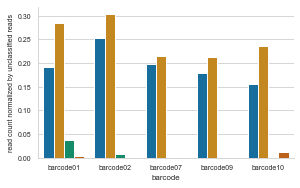

In [71]:
# Comparison of barcode performance between k13 only experiments and hrp2 barcode test (FC1) and reference panel (FC1)
# Figure 2a

normplot = sns.catplot(data=master_ab, x="barcode", y="norm_by_unclassified", kind="bar", hue="run", legend=False, height=2.8, aspect=4.4/2.8)   # Create a bar plot comparing the normalized by unclassified reads values between the k13 and hrp2 sequencing runs.
plt.xlabel('barcode', fontsize=8)   # Set the text and font size of the x label
plt.ylabel('read count normalized by unclassified reads', fontsize=7)   # Set the text and font size of the y label
plt.xticks(fontsize=7)   # Set the size of the x-axis tick labels
plt.yticks(fontsize=7)   # Set the size of the y-axis tick labels 
normplot.savefig("output/figure2a.svg")   # Save Figure 2a as a SVG
normplot.savefig("output/figure2a.png")   # Save Figure 2a as a PNG

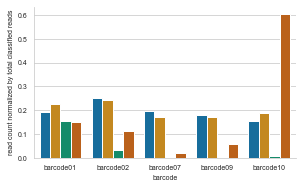

In [74]:
# Figure 2b

normplot = sns.catplot(data=master_ab, x="barcode", y="norm_by_total_classified", kind="bar", hue="run", height=2.8, aspect=4.4/2.8, legend=False)   # Create a bar plot comparing the normalized by total classified reads values between the k13 and hrp2 sequencing runs.
plt.xlabel('barcode', fontsize=7)    # Set the text and font size of the x label
plt.ylabel('read count normalized by total classified reads', fontsize=7)   # Set the text and font size of the y label
plt.xticks(fontsize=7)   # Set the size of the x-axis tick labels
plt.yticks(fontsize=7)   # Set the size of the y-axis tick labels
normplot.savefig("output/figure2b.svg")   # Save Figure 2b as a SVG
normplot.savefig("output/figure2b.png")   # Save Figure 2b as a PNG

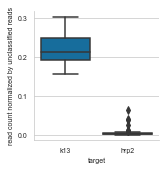

In [76]:
# Figure 2c

master_cd["norm_by_unclassified"] = norm(master_cd["barcode_read_count"], master_cd["unclassified_read_count"])   # Calculate "barcode_read_count" divided by "unclassified_read_count"
master_cd["norm_by_total_classified"] = norm(master_cd["barcode_read_count"], master_cd["total_classified_read_count"])   # Calculatee "barcode_read_count" divided by "total_classified_read_count"

normplot = sns.catplot(data=master_cd, x="target", y="norm_by_unclassified", kind="box", height=2.5, aspect=1)    # Create a box plot comparing the normalized by unclassified reads values between the k13 and hrp2 sequencing runs.
plt.xlabel('target', fontsize=7)    # Set the text and font size of the x label
plt.ylabel('read count normalized by unclassified reads', fontsize=7)   # Set the text and font size of the y label
plt.xticks(fontsize=7)   # Set the size of the x-axis tick labels
plt.yticks(fontsize=7)   # Set the size of the y-axis tick labels
normplot.savefig("output/figure2c.svg")   # Set Figure 2c as a SVG
normplot.savefig("output/figure2c.png")   # Set Figure 2c as a PNG

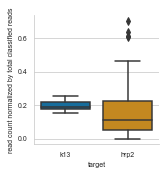

In [77]:
# Figure 2d

normplot = sns.catplot(data=master_cd, x="target", y="norm_by_total_classified", kind="box", height=2.5, aspect=1)    # Create a box plot comparing the normalized by unclassified reads values between the k13 and hrp2 sequencing runs.
plt.xlabel('target', fontsize=7)    # Set the text and font size of the x label
plt.ylabel('read count normalized by total classified reads', fontsize=7)   # Set the text and font size of the y label
plt.xticks(fontsize=7)   # Set the size of the x-axis tick labels
plt.yticks(fontsize=7)   # Set the size of the y-axis tick labels
normplot.savefig("output/figure2d.svg")   # Set Figure 2d as a SVG
normplot.savefig("output/figure2d.png")   # Set Figure 2d as a PNG

### Figure 3

"TES positivity threshold"


In [64]:
## Reorganize data into a dataframe that will serve this figure 

unclassified = ["unclassified"]     # Write "unclassified" to its own list. This is helpful when defining "total_class" and there's probably a better way to do it in the "total_class" code.

# FL1 TES

# Write barcode read counts to a variable
bc60 = len(fl1_tes_filt[fl1_tes_filt.barcode_arrangement == "barcode60"])   # Write the length of the list of dataframe entries which match "barcode60" in the "barcode_arrangement" column.
bc49 = len(fl1_tes_filt[fl1_tes_filt.barcode_arrangement == "barcode49"])   # Write the length of the list of dataframe entries which match "barcode49" in the "barcode_arrangement" column.
bc30 = len(fl1_tes_filt[fl1_tes_filt.barcode_arrangement == "barcode30"])   # Write the length of the list of dataframe entries which match "barcode30" in the "barcode_arrangement" column.
bc52 = len(fl1_tes_filt[fl1_tes_filt.barcode_arrangement == "barcode52"])   # Write the length of the list of dataframe entries which match "barcode52" in the "barcode_arrangement" column.
bc17 = len(fl1_tes_filt[fl1_tes_filt.barcode_arrangement == "barcode17"])   # Write the length of the list of dataframe entries which match "barcode17" in the "barcode_arrangement" column.
bc12 = len(fl1_tes_filt[fl1_tes_filt.barcode_arrangement == "barcode12"])   # Write the length of the list of dataframe entries which match "barcode12" in the "barcode_arrangement" column.
bc13 = len(fl1_tes_filt[fl1_tes_filt.barcode_arrangement == "barcode13"])   # Write the length of the list of dataframe entries which match "barcode13" in the "barcode_arrangement" column.
bc01 = len(fl1_tes_filt[fl1_tes_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.

unclass = len(fl1_tes_filt[fl1_tes_filt.barcode_arrangement == "unclassified"])   # Write the number of unclassified reads to variable "unclass"
true_class = bc60 + bc49 + bc30 + bc52 + bc17 + bc12 + bc13 + bc01   # Write the number of total true classified reads (i.e. reads that were assigned to barcodes that were used)
total_class = len(fl1_tes_filt[~fl1_tes_filt.barcode_arrangement.isin(unclassified)])   # Write the number of total classified reads in the run
total_reads = len(fl1_tes_filt)   # Write the number of total reads in the run

fl1_tes_tab = pd.DataFrame({'barcode':['barcode60', 'barcode49', 'barcode30', 'barcode52', 'barcode17', 'barcode12', 'barcode13', 'barcode01'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['145K', '260D', '279D', '365D', '3D7_pos', '3D', '45D', 'Dd2_neg'],   # Vector contains strings representing each sample ID
                       'control-sample':['sample', 'sample', 'sample', 'sample', 'pos_control', 'sample', 'sample', 'neg_control'],   # Vector contains strings representing each sample's status as control or sample
                       'med_coverage':[2176, 3, 401, 313, 2868, 661, 88, 7],   # Vector contains numerics representing the median coverage of each sample as derived from MultiQC report
                       'run':['FL1_TES'] * 8,   # Vector contains string representing the sequencing run
                       'barcode_read_count':[bc60, bc49, bc30, bc52, bc17, bc12, bc13, bc01],   # Vector contains numerics representing the read count for each true barcode
                       'unclassified_read_count':[unclass] * 8,   # Vector contains numeric representing the number of unclassified reads in the sequencing runs
                       'true_classified_read_count':[true_class] * 8,   # Vector contains numeric representing the number of reads correctly classified, i.e. assigned to barcodes that were used in the experiment
                       'total_classified_read_count':[total_class] * 8,   # Vector contains numeric representing the total number of classified reads
                       'total_reads':[total_reads] * 8,   # Vector contains numeric representing the total number of passing reads in the sequencing runs
                       'antigen_status':['pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'control', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'control']})   # Vector contains strings representing the antigen/PCR postivity/negativity for hrp2 and hrp3 found previously, or indicates the sample is a control.

# FL2 TES

bc49 = len(fl2_tes_filt[fl2_tes_filt.barcode_arrangement == "barcode49"])   # Write the length of the list of dataframe entries which match "barcode49" in the "barcode_arrangement" column.
bc18 = len(fl2_tes_filt[fl2_tes_filt.barcode_arrangement == "barcode18"])   # Write the length of the list of dataframe entries which match "barcode18" in the "barcode_arrangement" column.
bc02 = len(fl2_tes_filt[fl2_tes_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc30 = len(fl2_tes_filt[fl2_tes_filt.barcode_arrangement == "barcode30"])   # Write the length of the list of dataframe entries which match "barcode30" in the "barcode_arrangement" column.
bc12 = len(fl2_tes_filt[fl2_tes_filt.barcode_arrangement == "barcode12"])   # Write the length of the list of dataframe entries which match "barcode12" in the "barcode_arrangement" column.
bc13 = len(fl2_tes_filt[fl2_tes_filt.barcode_arrangement == "barcode13"])   # Write the length of the list of dataframe entries which match "barcode13" in the "barcode_arrangement" column.
bc52 = len(fl2_tes_filt[fl2_tes_filt.barcode_arrangement == "barcode52"])   # Write the length of the list of dataframe entries which match "barcode52" in the "barcode_arrangement" column.
bc60 = len(fl2_tes_filt[fl2_tes_filt.barcode_arrangement == "barcode60"])   # Write the length of the list of dataframe entries which match "barcode60" in the "barcode_arrangement" column.

unclass = len(fl2_tes_filt[fl2_tes_filt.barcode_arrangement == "unclassified"])   # Write the number of unclassified reads to variable "unclass"
true_class = bc49 + bc18 + bc02 + bc30 + bc12 + bc13 + bc52 + bc60   # Write the number of total true classified reads (i.e. reads that were assigned to barcodes that were used)
total_class = len(fl2_tes_filt[~fl2_tes_filt.barcode_arrangement.isin(unclassified)])   # Write the number of total classified reads in the run
total_reads = len(fl2_tes_filt)   # Write the number of total reads in the run

fl2_tes_tab = pd.DataFrame({'barcode':['barcode49', 'barcode18', 'barcode02', 'barocde30', 'barcode12', 'barcode13', 'barcode52', 'barcode60'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['113R', '175K', '176K', '186R', '259K', '261K', '3D7_pos', 'Dd2_neg'],   # Vector contains strings representing each sample ID
                       'control-sample':['sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'pos_control', 'neg_control'],   # Vector contains strings representing each sample's status as control or sample.
                       'med_coverage':[362, 468, 979, 674, 443, 1, 1658, 7],   # Vector contains numerics representing the median coverage of each sample as derived from MultiQC report
                       'run':['FL2_TES'] * 8,   # Vector contains string representing the sequencing run
                       'barcode_read_count':[bc49, bc18, bc02, bc30, bc12, bc13, bc52, bc60],   # Vector contains numerics representing the read count for each true barcode
                       'unclassified_read_count':[unclass] * 8,   # Vector contains numeric representing the number of unclassified reads in the sequencing runs
                       'true_classified_read_count':[true_class] * 8,   # Vector contains numeric representing the number of reads correctly classified, i.e. assigned to barcodes that were used in the experiment
                       'total_classified_read_count':[total_class] * 8,   # Vector contains numeric representing the total number of classified reads
                       'total_reads':[total_reads] * 8,  # Vector contains numeric representing the total number of passing reads in the sequencing runs
                       'antigen_status':['pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'control', 'control']})   # Vector contains strings representing the antigen/PCR postivity/negativity for hrp2 and hrp3 found previously, or indicates the sample is a control.

# FL3 TES

bc18 = len(fl3_tes_filt[fl3_tes_filt.barcode_arrangement == "barcode18"])   # Write the length of the list of dataframe entries which match "barcode18" in the "barcode_arrangement" column.
bc02 = len(fl3_tes_filt[fl3_tes_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc12 = len(fl3_tes_filt[fl3_tes_filt.barcode_arrangement == "barcode12"])   # Write the length of the list of dataframe entries which match "barcode12" in the "barcode_arrangement" column.
bc13 = len(fl3_tes_filt[fl3_tes_filt.barcode_arrangement == "barcode13"])   # Write the length of the list of dataframe entries which match "barcode13" in the "barcode_arrangement" column.
bc17 = len(fl3_tes_filt[fl3_tes_filt.barcode_arrangement == "barcode17"])   # Write the length of the list of dataframe entries which match "barcode17" in the "barcode_arrangement" column.
bc01 = len(fl3_tes_filt[fl3_tes_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.
bc49 = len(fl3_tes_filt[fl3_tes_filt.barcode_arrangement == "barcode49"])   # Write the length of the list of dataframe entries which match "barcode49" in the "barcode_arrangement" column.
bc52 = len(fl3_tes_filt[fl3_tes_filt.barcode_arrangement == "barcode52"])   # Write the length of the list of dataframe entries which match "barcode52" in the "barcode_arrangement" column.

unclass = len(fl3_tes_filt[fl3_tes_filt.barcode_arrangement == "unclassified"])   # Write the number of unclassified reads to variable "unclass"
true_class = bc18 + bc02 + bc12 + bc13 + bc17 + bc01 + bc49 + bc52 # Write the number of total true classified reads (i.e. reads that were assigned to barcodes that were used)
total_class = len(fl3_tes_filt[~fl3_tes_filt.barcode_arrangement.isin(unclassified)]) # Write the number of total classified reads in the run
total_reads = len(fl3_tes_filt) # Write the number of total reads in the run

fl3_tes_tab = pd.DataFrame({'barcode':['barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode17', 'barcode01', 'barcode49', 'barcode52'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['110R', '3020M', '3033M', '3034M', '338R', '355R', '3D7_pos', 'Dd2_neg'],   # Vector contains strings representing each sample ID
                       'control-sample':['sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'pos_control', 'neg_control'],   # Vector contains strings representing each sample's status as control or sample.
                       'med_coverage':[17, 1481, 453, 466, 1454, 755, 3460, 7],   # Vector contains numerics representing the median coverage of each sample as derived from MultiQC report
                       'run':['FL3_TES'] * 8,   # Vector contains string representing the sequencing run
                       'barcode_read_count':[bc18, bc02, bc12, bc13, bc17, bc01, bc49, bc52],   # Vector contains numerics representing the read count for each true barcode
                       'unclassified_read_count':[unclass] * 8,   # Vector contains numeric representing the number of unclassified reads in the sequencing runs
                       'true_classified_read_count':[true_class] * 8,   # Vector contains numeric representing the number of reads correctly classified, i.e. assigned to barcodes that were used in the experiment
                       'total_classified_read_count':[total_class] * 8,  # Vector contains numeric representing the total number of classified reads
                       'total_reads':[total_reads] * 8,  # Vector contains numeric representing the total number of passing reads in the sequencing runs
                       'antigen_status':['pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'pfhrp2+/pfhrp3+', 'control', 'control']})   # Vector contains strings representing the antigen/PCR postivity/negativity for hrp2 and hrp3 found previously, or indicates the sample is a control.


# FL4 TES

bc02 = len(fl4_tes_filt[fl4_tes_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc18 = len(fl4_tes_filt[fl4_tes_filt.barcode_arrangement == "barcode18"])   # Write the length of the list of dataframe entries which match "barcode18" in the "barcode_arrangement" column.
bc60 = len(fl4_tes_filt[fl4_tes_filt.barcode_arrangement == "barcode60"])   # Write the length of the list of dataframe entries which match "barcode60" in the "barcode_arrangement" column.
bc13 = len(fl4_tes_filt[fl4_tes_filt.barcode_arrangement == "barcode13"])   # Write the length of the list of dataframe entries which match "barcode13" in the "barcode_arrangement" column.
bc17 = len(fl4_tes_filt[fl4_tes_filt.barcode_arrangement == "barcode17"])   # Write the length of the list of dataframe entries which match "barcode17" in the "barcode_arrangement" column.
bc01 = len(fl4_tes_filt[fl4_tes_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.
bc49 = len(fl4_tes_filt[fl4_tes_filt.barcode_arrangement == "barcode49"])   # Write the length of the list of dataframe entries which match "barcode49" in the "barcode_arrangement" column.
bc12 = len(fl4_tes_filt[fl4_tes_filt.barcode_arrangement == "barcode12"])   # Write the length of the list of dataframe entries which match "barcode12" in the "barcode_arrangement" column.


unclass = len(fl4_tes_filt[fl4_tes_filt.barcode_arrangement == "unclassified"])   # Write the number of unclassified reads to variable "unclass"
true_class = bc02 + bc18 + bc60 + bc13 + bc17 + bc01 + bc49 + bc52   # Write the number of total true classified reads (i.e. reads that were assigned to barcodes that were used)
total_class = len(fl4_tes_filt[~fl4_tes_filt.barcode_arrangement.isin(unclassified)])   # Write the number of total classified reads in the run
total_reads = len(fl4_tes_filt)   # Write the number of total reads in the run

fl4_tes_tab = pd.DataFrame({'barcode':['barcode02', 'barcode18', 'barcode60', 'barcode13', 'barcode17', 'barcode01', 'barcode49', 'barcode12'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['1002', '276', '384M', '3D7_pos', '469M', '63', 'Dd2_neg', 'A53'],   # Vector contains strings representing each sample ID
                       'control-sample':['sample', 'sample', 'sample', 'pos_control', 'sample', 'sample', 'neg_control', 'sample'],   # Vector contains strings representing each sample's status as control or sample.
                       'med_coverage':[5, 3, 15, 3244, 4, 18, 6, 2],   # Vector contains numerics representing the median coverage of each sample as derived from MultiQC report
                       'run':['FL4_TES'] * 8,   # Vector contains string representing the sequencing run
                       'barcode_read_count':[bc02, bc18, bc60, bc13, bc17, bc01, bc49, bc12],   # Vector contains numerics representing the read count for each true barcode
                       'unclassified_read_count':[unclass] * 8,   # Vector contains numeric representing the number of unclassified reads in the sequencing runs
                       'true_classified_read_count':[true_class] * 8,    # Vector contains numeric representing the number of reads correctly classified, i.e. assigned to barcodes that were used in the experiment
                       'total_classified_read_count':[total_class] * 8,  # Vector contains numeric representing the total number of classified reads
                       'total_reads':[total_reads] * 8,  # Vector contains numeric representing the total number of passing reads in the sequencing runs
                       'antigen_status':['pfhrp2-/pfhrp3+', 'pfhrp2-/pfhrp3+', 'pfhrp2+/pfhrp3+', 'control', 'pfhrp2-/pfhrp3+', 'pfhrp2-/pfhrp3+', 'control', 'pfhrp2-/pfhrp3+']})   # Vector contains strings representing the antigen/PCR postivity/negativity for hrp2 and hrp3 found previously, or indicates the sample is a control.

# FL5 TES

bc60 = len(fl5_tes_filt[fl5_tes_filt.barcode_arrangement == "barcode60"])   # Write the length of the list of dataframe entries which match "barcode60" in the "barcode_arrangement" column.
bc17 = len(fl5_tes_filt[fl5_tes_filt.barcode_arrangement == "barcode17"])   # Write the length of the list of dataframe entries which match "barcode17" in the "barcode_arrangement" column.
bc01 = len(fl5_tes_filt[fl5_tes_filt.barcode_arrangement == "barcode01"])   # Write the length of the list of dataframe entries which match "barcode01" in the "barcode_arrangement" column.
bc30 = len(fl5_tes_filt[fl5_tes_filt.barcode_arrangement == "barcode30"])   # Write the length of the list of dataframe entries which match "barcode30" in the "barcode_arrangement" column.
bc52 = len(fl5_tes_filt[fl5_tes_filt.barcode_arrangement == "barcode52"])   # Write the length of the list of dataframe entries which match "barcode52" in the "barcode_arrangement" column.
bc18 = len(fl5_tes_filt[fl5_tes_filt.barcode_arrangement == "barcode18"])   # Write the length of the list of dataframe entries which match "barcode18" in the "barcode_arrangement" column.

unclass = len(fl5_tes_filt[fl5_tes_filt.barcode_arrangement == "unclassified"])   # Write the number of total true classified reads (i.e. reads that were assigned to barcodes that were used)
true_class = bc60 + bc17 + bc01 + bc30 + bc52 + bc18   # Write the number of total classified reads in the run
total_class = len(fl5_tes_filt[~fl5_tes_filt.barcode_arrangement.isin(unclassified)])# Write the number of total classified reads in the run
total_reads = len(fl5_tes_filt)   # Write the number of total reads in the run

fl5_tes_tab = pd.DataFrame({'barcode':['barcode60', 'barcode17', 'barcode01', 'barcode30', 'barcode52', 'barcode18'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['187E', '213E', '3D7_pos', 'A413', 'A529', 'Dd2_neg'],   # Vector contains strings representing each sample ID
                       'control-sample':['sample', 'sample', 'pos_control', 'sample', 'sample', 'neg_control'],   # Vector contains strings representing each sample's status as control or sample.
                       'med_coverage':[8, 11, 1822, 4, 2, 1],   # Vector contains numerics representing the median coverage of each sample as derived from MultiQC report
                       'run':["FL5_TES"] * 6,   # Vector contains string representing the sequencing run
                       'barcode_read_count':[bc60, bc17, bc01, bc30, bc52, bc18],   # Vector contains numerics representing the read count for each true barcode
                       'unclassified_read_count':[unclass] * 6,   # Vector contains numeric representing the number of unclassified reads in the sequencing runs
                       'true_classified_read_count':[true_class] * 6,   # Vector contains numeric representing the number of reads correctly classified, i.e. assigned to barcodes that were used in the experiment
                       'total_classified_read_count':[total_class] * 6,  # Vector contains numeric representing the total number of classified reads
                       'total_reads':[total_reads] * 6,  # Vector contains numeric representing the total number of passing reads in the sequencing runs
                       'antigen_status':['pfhrp2-/pfhrp3+', 'pfhrp2-/pfhrp3+', 'control', 'pfhrp2-/pfhrp3+', 'pfhrp2-/pfhrp3+', 'control']})   # Vector contains strings representing the antigen/PCR postivity/negativity for hrp2 and hrp3 found previously, or indicates the sample is a control.

# FL6

bc49 = len(fl6_tes_filt[fl6_tes_filt.barcode_arrangement == "barcode49"])   # Write the length of the list of dataframe entries which match "barcode49" in the "barcode_arrangement" column.
bc13 = len(fl6_tes_filt[fl6_tes_filt.barcode_arrangement == "barcode13"])   # Write the length of the list of dataframe entries which match "barcode13" in the "barcode_arrangement" column.
bc30 = len(fl6_tes_filt[fl6_tes_filt.barcode_arrangement == "barcode30"])   # Write the length of the list of dataframe entries which match "barcode30" in the "barcode_arrangement" column.
bc12 = len(fl6_tes_filt[fl6_tes_filt.barcode_arrangement == "barcode12"])   # Write the length of the list of dataframe entries which match "barcode12" in the "barcode_arrangement" column.
bc02 = len(fl6_tes_filt[fl6_tes_filt.barcode_arrangement == "barcode02"])   # Write the length of the list of dataframe entries which match "barcode02" in the "barcode_arrangement" column.
bc52 = len(fl6_tes_filt[fl6_tes_filt.barcode_arrangement == "barcode52"])   # Write the length of the list of dataframe entries which match "barcode52" in the "barcode_arrangement" column.

unclass = len(fl6_tes_filt[fl6_tes_filt.barcode_arrangement == "unclassified"])   # Write the number of unclassified reads to variable "unclass"
true_class = bc49 + bc13 + bc30 + bc12 + bc02 + bc52   # Write the number of total classified reads in the run
total_class = len(fl6_tes_filt[~fl6_tes_filt.barcode_arrangement.isin(unclassified)])   # Write the number of total classified reads in the run
total_reads = len(fl6_tes_filt)   # Write the number of total reads in the run

fl6_tes_tab = pd.DataFrame({'barcode':['barcode49', 'barcode13', 'barcode30', 'barcode12', 'barcode02', 'barcode52'],   # Vector contains strings representing each true barcode.
                       'sample_ID':['154E', '23E', '3D7_pos', '430E', '469E', 'Dd2_neg'],   # Vector contains strings representing each sample ID
                       'control-sample':['sample', 'sample', 'pos_control', 'sample', 'sample', 'neg_control'],   # Vector contains strings representing each sample's status as control or sample.
                       'med_coverage':[13, 7, 5359, 9, 9, 7],   # Vector contains numerics representing the median coverage of each sample as derived from MultiQC report
                       'run':["FL6_TES"] * 6,   # Vector contains string representing the sequencing run
                       'barcode_read_count':[bc49, bc13, bc30, bc12, bc02, bc52],   # Vector contains numerics representing the read count for each true barcode
                       'unclassified_read_count':[unclass] * 6,   # Vector contains numeric representing the number of unclassified reads in the sequencing runs
                       'true_classified_read_count':[true_class] * 6,   # Vector contains numeric representing the number of reads correctly classified, i.e. assigned to barcodes that were used in the experiment
                       'total_classified_read_count':[total_class] * 6,  # Vector contains numeric representing the total number of classified reads
                       'total_reads':[total_reads] * 6,  # Vector contains numeric representing the total number of passing reads in the sequencing runs
                       'antigen_status':['pfhrp2-/pfhrp3-', 'pfhrp2-/pfhrp3-','control', 'pfhrp2-/pfhrp3-', 'pfhrp2-/pfhrp3+', 'control']})   # Vector contains strings representing the antigen/PCR postivity/negativity for hrp2 and hrp3 found previously, or indicates the sample is a control.



In [65]:
# Calculate octiles between negative and positive controls for each sequencing run

# Order each separate table by the "control-sample" variable
fl1_tes_tab['control-sample'] = pd.Categorical(fl1_tes_tab['control-sample'], ['pos_control', 'neg_control', 'sample'], ordered=True)
fl2_tes_tab['control-sample'] = pd.Categorical(fl2_tes_tab['control-sample'], ['pos_control', 'neg_control', 'sample'], ordered=True)
fl3_tes_tab['control-sample'] = pd.Categorical(fl3_tes_tab['control-sample'], ['pos_control', 'neg_control', 'sample'], ordered=True)
fl4_tes_tab['control-sample'] = pd.Categorical(fl4_tes_tab['control-sample'], ['pos_control', 'neg_control', 'sample'], ordered=True)
fl5_tes_tab['control-sample'] = pd.Categorical(fl5_tes_tab['control-sample'], ['pos_control', 'neg_control', 'sample'], ordered=True)
fl6_tes_tab['control-sample'] = pd.Categorical(fl6_tes_tab['control-sample'], ['pos_control', 'neg_control', 'sample'], ordered=True)

# Find the indices of the positive and negative controls and write to list
fl1_tes_control_idx = fl1_tes_tab.index[fl1_tes_tab['antigen_status']=="control"].tolist()
fl2_tes_control_idx = fl2_tes_tab.index[fl2_tes_tab['antigen_status']=="control"].tolist()
fl3_tes_control_idx = fl3_tes_tab.index[fl3_tes_tab['antigen_status']=="control"].tolist()
fl4_tes_control_idx = fl4_tes_tab.index[fl4_tes_tab['antigen_status']=="control"].tolist()
fl5_tes_control_idx = fl5_tes_tab.index[fl5_tes_tab['antigen_status']=="control"].tolist()
fl6_tes_control_idx = fl6_tes_tab.index[fl6_tes_tab['antigen_status']=="control"].tolist()

# Calculate the lowest octile between the coverages of negative and positive controls.
# If either control has a median coverage of zero, a message will appear, and if the negative
#   control is zero, the octile will be based on the median coverage of the positive control.''

print("FL1 TES calculation")
if (fl1_tes_tab.loc[fl1_tes_control_idx[0], 'med_coverage'])==0:
    print("Median coverage of " + fl1_tes_tab.loc[fl1_tes_control_idx[0], 'sample_ID'] + " equals 0")
elif (fl1_tes_tab.loc[fl1_tes_control_idx[1], 'med_coverage'])==0:
    print("Median coverage of " + fl1_tes_tab.loc[fl1_tes_control_idx[1], 'sample_ID'] + " equals 0")
    fl1_tes_oct1=(fl1_tes_tab.loc[fl1_tes_control_idx[0], 'med_coverage'])/8
else:
    fl1_tes_oct1 = (((fl1_tes_tab.loc[fl1_tes_control_idx[0],'med_coverage'])+(fl1_tes_tab.loc[fl1_tes_control_idx[1], 'med_coverage']))/8)+(fl1_tes_tab.loc[fl1_tes_control_idx[1],'med_coverage'])
print("Set FL1 refline at ", fl1_tes_oct1)

# Find indices of all experimental samples
fl1_tes_sample_idx = fl1_tes_tab.index[fl1_tes_tab['antigen_status']!="control"].tolist()

if fl1_tes_sample_idx !=0:
    print("Putative positives: ")
    for i in fl1_tes_sample_idx:
        if (fl1_tes_tab.loc[i, 'med_coverage']) >= fl1_tes_oct1:
            print(fl1_tes_tab.loc[i, 'sample_ID'])
    print("")
    print("Putative negatives: ")
    for i in fl1_tes_sample_idx:
        if (fl1_tes_tab.loc[i, 'med_coverage'])<fl1_tes_oct1:
            print(fl1_tes_tab.loc[i, 'sample_ID'])
else:
    print("No samples in list, please check dataframe.")

print("")
print("")

print("FL2 TES calculation")
if (fl2_tes_tab.loc[fl2_tes_control_idx[1], 'med_coverage'])==0:
    print("Median coverage of " + fl2_tes_tab.loc[fl2_tes_control_idx[1], 'sample_ID'] + " equals 0")
    fl2_tes_oct1 = (fl2_tes_tab.loc[fl2_tes_control_idx[0], 'med_coverage'])/8
else:
    fl2_tes_oct1 = (((fl2_tes_tab.loc[fl2_tes_control_idx[0], 'med_coverage'])+(fl2_tes_tab.loc[fl2_tes_control_idx[1], 'med_coverage']))/8)+(fl2_tes_tab.loc[fl2_tes_control_idx[1], 'med_coverage'])
print("Set FL2 refline at", fl2_tes_oct1)

fl2_tes_sample_index = fl2_tes_tab.index[fl2_tes_tab['antigen_status']!="control"].tolist()

if fl2_tes_sample_index !=0:
    print("Putative positives: ")
    for i in fl2_tes_sample_index:
        if (fl2_tes_tab.loc[i, 'med_coverage']) >= fl2_tes_oct1:
            print(fl2_tes_tab.loc[i, 'sample_ID'])
    print("")
    print("Putative negatives: ")
    for i in fl2_tes_sample_index:
        if (fl2_tes_tab.loc[i, 'med_coverage']) < fl2_tes_oct1:
            print(fl2_tes_tab.loc[i, 'sample_ID'])
else:
    print("No samples in list, please check dataframe.")
    
print("")
print("")

print("FL3 TES calculation")
if (fl3_tes_tab.loc[fl3_tes_control_idx[1], 'med_coverage'])==0:
    print("Median coverage of " + fl3_tes_tab.loc[fl3_control_idx[1], 'sample_ID'] + " equals 0")
    fl3_tes_oct1 = (fl3_tes_tab.loc[fl3_tes_control_idx[0], 'med_coverage'])/8
else:
    fl3_tes_oct1 = (((fl3_tes_tab.loc[fl3_tes_control_idx[0], 'med_coverage']) + (fl3_tes_tab.loc[fl3_tes_control_idx[1], 'med_coverage']))/8) + (fl3_tes_tab.loc[fl3_tes_control_idx[1], 'med_coverage'])
print("Set FL3 refline at", fl3_tes_oct1)

fl3_tes_sample_index = fl3_tes_tab.index[fl3_tes_tab['antigen_status']!='control'].tolist()

if fl3_tes_sample_index !=0:
    print("Putative positives: ")
    for i in fl3_tes_sample_index:
        if (fl3_tes_tab.loc[i, 'med_coverage']) >= fl3_tes_oct1:
            print(fl3_tes_tab.loc[i, 'sample_ID'])
    print("")
    print("Putative negatives: ")
    for i in fl3_tes_sample_index:
        if (fl3_tes_tab.loc[i, 'med_coverage']) < fl3_tes_oct1:
            print(fl3_tes_tab.loc[i, 'sample_ID'])
else:
    print("No samples in list, please check dataframe.")
    
print("")
print("")

print("FL4 TES calculation")
if (fl4_tes_tab.loc[fl4_tes_control_idx[1], 'med_coverage']) == 0:
    print("Median coverage of " + fl4_tes_tab.loc[fl4_tes_control_idx[1], 'sample_ID'] + " equals 0")
    fl4_tes_oct1 = (fl4_tes_tab.loc[fl4_tes_control_idx[0], 'med_coverage'])/8
else:
    fl4_tes_oct1 = (((fl4_tes_tab.loc[fl4_tes_control_idx[0], 'med_coverage']) + (fl4_tes_tab.loc[fl4_tes_control_idx[1], 'med_coverage']))/8) + (fl4_tes_tab.loc[fl4_tes_control_idx[1], 'med_coverage'])
print("Set FL4 refline at", fl4_tes_oct1)

fl4_tes_sample_index = fl4_tes_tab.index[fl4_tes_tab['antigen_status']!='control'].tolist()

if fl4_tes_sample_index != 0:
    print("Putative positives: ")
    for i in fl4_tes_sample_index:
        if (fl4_tes_tab.loc[i, 'med_coverage']) >= fl4_tes_oct1:
            print(fl4_tes_tab.loc[i, 'sample_ID'])
    print("")
    print("Putative negatives: ")
    for i in fl4_tes_sample_index:
        if (fl4_tes_tab.loc[i, 'med_coverage']) < fl4_tes_oct1:
            print(fl4_tes_tab.loc[i, 'sample_ID'])
else:
    print("No samples in list, please check dataframe.")
    
print("")
print("")

print("FC5 TES calculation")
if (fl5_tes_tab.loc[fl5_tes_control_idx[1], 'med_coverage']) == 0:
    print("Median coverage of " + fl5_tes_tab.loc[fl5_tes_control_idx[1], 'sample_ID'] + " equals 0")
    fl5_tes_oct1 = (fl5_tes_tab.loc[fl5_tes_control_idx[0], 'med_coverage'])/8
else:
    fl5_tes_oct1 = (((fl5_tes_tab.loc[fl5_tes_control_idx[0], 'med_coverage']) + (fl5_tes_tab.loc[fl5_tes_control_idx[1], 'med_coverage']))/8) + (fl5_tes_tab.loc[fl5_tes_control_idx[1], 'med_coverage'])
print("Set FL5 refline at", fl5_tes_oct1)

fl5_tes_sample_index = fl5_tes_tab.index[fl5_tes_tab['antigen_status']!='control'].tolist()

if fl5_tes_sample_index != 0:
    print("Putative positives: ")
    for i in fl5_tes_sample_index:
        if (fl5_tes_tab.loc[i, 'med_coverage']) >= fl5_tes_oct1:
            print(fl5_tes_tab.loc[i, 'sample_ID'])
    print("")
    print("Putative negatives: ")
    for i in fl5_tes_sample_index:
        if (fl5_tes_tab.loc[i, 'med_coverage']) < fl5_tes_oct1:
            print(fl5_tes_tab.loc[i, 'sample_ID'])
else:
    print("No samples in list, please check dataframe.")
    
print("")
print("")

print("FC6 TES calculation")
if (fl6_tes_tab.loc[fl6_tes_control_idx[1], 'med_coverage']) == 0:
    print("Median coverage of " + fl6_tes_tab.loc[fl6_tes_control_idx[1], 'sample_ID'] + " equals 0")
    fl6_tes_oct1 = (fl6_tes_tab.loc[fl6_tes_control_idx[0], 'med_coverage'])/8
else:
    fl6_tes_oct1 = (((fl6_tes_tab.loc[fl6_tes_control_idx[0], 'med_coverage']) + (fl6_tes_tab.loc[fl6_tes_control_idx[1], 'med_coverage']))/8) + (fl6_tes_tab.loc[fl6_tes_control_idx[1], 'med_coverage'])
print("Set FL6 refline at: ", fl6_tes_oct1)

fl6_tes_sample_index = fl6_tes_tab.index[fl6_tes_tab['antigen_status']!='control'].tolist()

if fl6_tes_sample_index != 0:
    print("Putative positives: ")
    for i in fl6_tes_sample_index:
        if (fl6_tes_tab.loc[i, 'med_coverage']) >= fl6_tes_oct1:
            print(fl6_tes_tab.loc[i, 'sample_ID'])
    print("")
    print("Putative negatives: ")
    for i in fl6_tes_sample_index:
        if (fl6_tes_tab.loc[i, 'med_coverage']) < fl6_tes_oct1:
            print(fl6_tes_tab.loc[i, 'sample_ID'])
else:
    print("No samples in list, please check dataframe.")

FL1 TES calculation
Set FL1 refline at  366.375
Putative positives: 
145K
279D
3D

Putative negatives: 
260D
365D
45D


FL2 TES calculation
Set FL2 refline at 215.125
Putative positives: 
113R
175K
176K
186R
259K

Putative negatives: 
261K


FL3 TES calculation
Set FL3 refline at 440.375
Putative positives: 
3020M
3033M
3034M
338R
355R

Putative negatives: 
110R


FL4 TES calculation
Set FL4 refline at 412.25
Putative positives: 

Putative negatives: 
1002
276
384M
469M
63
A53


FC5 TES calculation
Set FL5 refline at 228.875
Putative positives: 

Putative negatives: 
187E
213E
A413
A529


FC6 TES calculation
Set FL6 refline at:  677.75
Putative positives: 

Putative negatives: 
154E
23E
430E
469E


In [66]:
master = pd.concat([fl1_tes_tab, fl2_tes_tab, fl3_tes_tab, fl4_tes_tab, fl5_tes_tab, fl6_tes_tab])
master = master.reset_index()

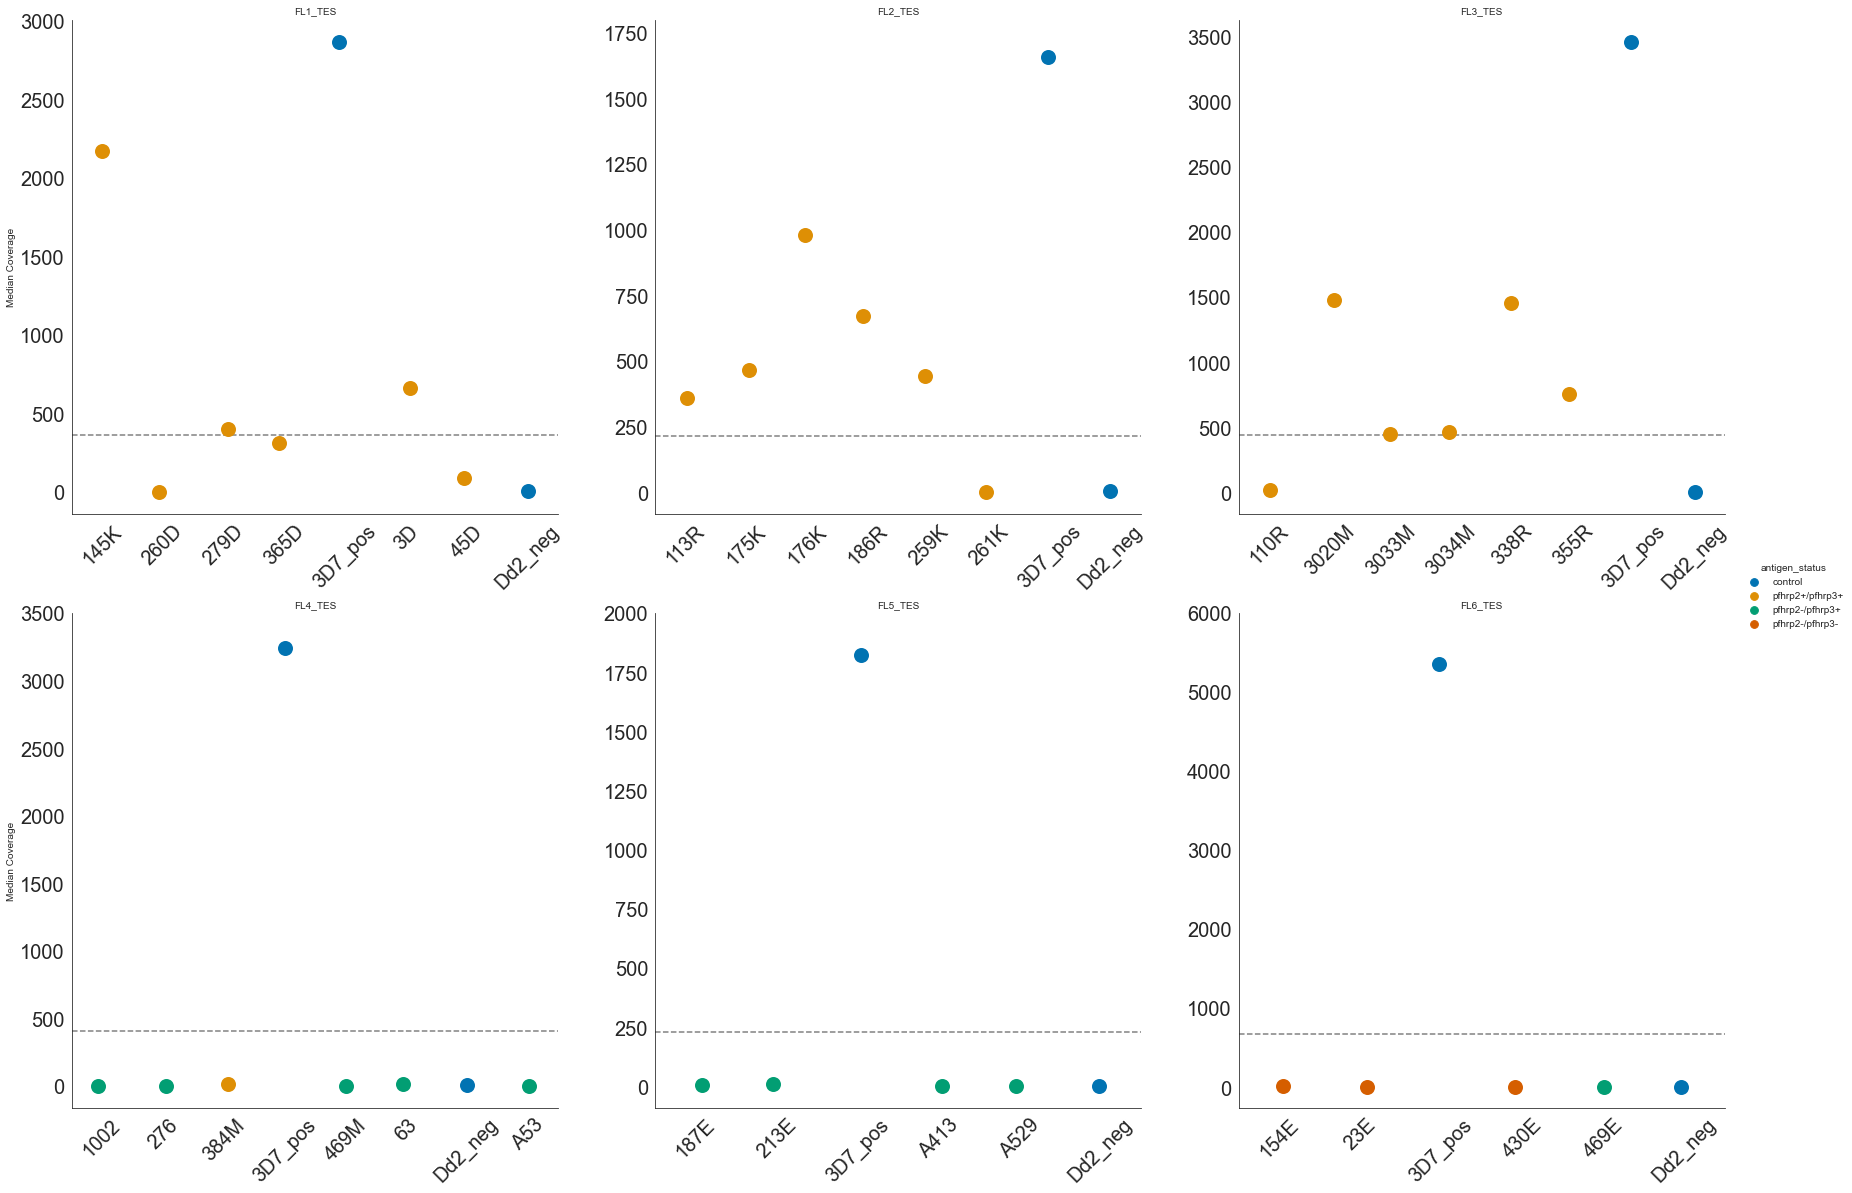

In [68]:
with sns.axes_style("white"):
    g = sns.catplot(data=master, x="sample_ID", y="med_coverage", 
                    hue="antigen_status", hue_order=['control', 'pfhrp2+/pfhrp3+', 'pfhrp2-/pfhrp3+', 'pfhrp2-/pfhrp3-'], 
                    kind="strip", col="run", col_wrap=3, sharex=False, sharey=False, palette="colorblind", 
                    s=15, height=8, aspect=8/8)

g.axes[0].axhline(fl1_tes_oct1, ls='--', c='grey')
g.axes[1].axhline(fl2_tes_oct1, ls='--', c='grey')
g.axes[2].axhline(fl3_tes_oct1, ls='--', c='grey')
g.axes[3].axhline(fl4_tes_oct1, ls='--', c='grey')
g.axes[4].axhline(fl5_tes_oct1, ls='--', c='grey')
g.axes[5].axhline(fl6_tes_oct1, ls='--', c='grey')
g.axes[1].set_ylim(None,1800)
g.axes[3].set_ylim(None,3500)
g.axes[4].set_ylim(None,2000)
g.axes[5].set_ylim(None,6000)
g.set_titles("{col_name}")
g.set_axis_labels("", "Median Coverage")

for axis in g.axes:
    for label in axis.get_xticklabels():
        label.set_rotation(45)

for ax in g.axes:
    ax.tick_params(axis='both', labelsize=20)

g.figure.subplots_adjust(wspace=0.2, hspace=0.2)

plt.savefig("output/figure_3.svg")
plt.savefig("output/figure_3.png")

### Figure 4

__Reference panel repeat types__


In [48]:
## Add an additional 'strain' column to each previously prepared repeat type table so they can be combined in a master sheet and sorted by strain.

fc1_mr4_bc01_3D7_uncount['strain'] = ['3D7'] * len(fc1_mr4_bc01_3D7_uncount)
fc1_mr4_bc02_FC27_uncount['strain'] = ['FC27'] * len(fc1_mr4_bc02_FC27_uncount)
fc1_mr4_bc17_7G8_uncount['strain'] = ['7G8'] * len(fc1_mr4_bc17_7G8_uncount)
fc1_mr4_bc18_HB3_uncount['strain'] = ['HB3'] * len(fc1_mr4_bc18_HB3_uncount)

fc2_mr4_bc01_HB3_uncount['strain'] = ['HB3'] * len(fc2_mr4_bc01_HB3_uncount)
fc2_mr4_bc12_7G8_uncount['strain'] = ['7G8'] * len(fc2_mr4_bc12_7G8_uncount)
fc2_mr4_bc17_3D7_uncount['strain'] = ['3D7'] * len(fc2_mr4_bc17_3D7_uncount)
fc2_mr4_bc18_FC27_uncount['strain'] = ['FC27'] * len(fc2_mr4_bc18_FC27_uncount)

fl1_mr4_bc01_FC27_uncount['strain'] = ['FC27'] * len(fl1_mr4_bc01_FC27_uncount)
fl1_mr4_bc02_7G8_uncount['strain'] = ['7G8'] * len(fl1_mr4_bc02_7G8_uncount)
fl1_mr4_bc12_3D7_uncount['strain'] = ['3D7'] * len(fl1_mr4_bc12_3D7_uncount)
fl1_mr4_bc17_HB3_uncount['strain'] = ['HB3'] * len(fl1_mr4_bc17_HB3_uncount)

fl2_mr4_bc02_3D7_uncount['strain'] = ['3D7'] * len(fl2_mr4_bc02_3D7_uncount)
fl2_mr4_bc12_HB3_uncount['strain'] = ['HB3'] * len(fl2_mr4_bc12_HB3_uncount)
fl2_mr4_bc17_FC27_uncount['strain'] = ['FC27'] * len(fl2_mr4_bc17_FC27_uncount)
fl2_mr4_bc18_7G8_uncount['strain'] = ['7G8'] * len(fl2_mr4_bc18_7G8_uncount)

# Create a master data frame of all MR4 repeat type tables
master = pd.concat([fc1_mr4_bc01_3D7_uncount, fc1_mr4_bc02_FC27_uncount, fc1_mr4_bc17_7G8_uncount, fc1_mr4_bc18_HB3_uncount, fc2_mr4_bc01_HB3_uncount, fc2_mr4_bc12_7G8_uncount, fc2_mr4_bc17_3D7_uncount, fc2_mr4_bc18_FC27_uncount, fl1_mr4_bc01_FC27_uncount, fl1_mr4_bc02_7G8_uncount, fl1_mr4_bc12_3D7_uncount, fl1_mr4_bc17_HB3_uncount, fl2_mr4_bc02_3D7_uncount])   # Concatenate separate dataframes into a single master dataframe.
master = master.reset_index()   # Reset the index of the master dataframe.


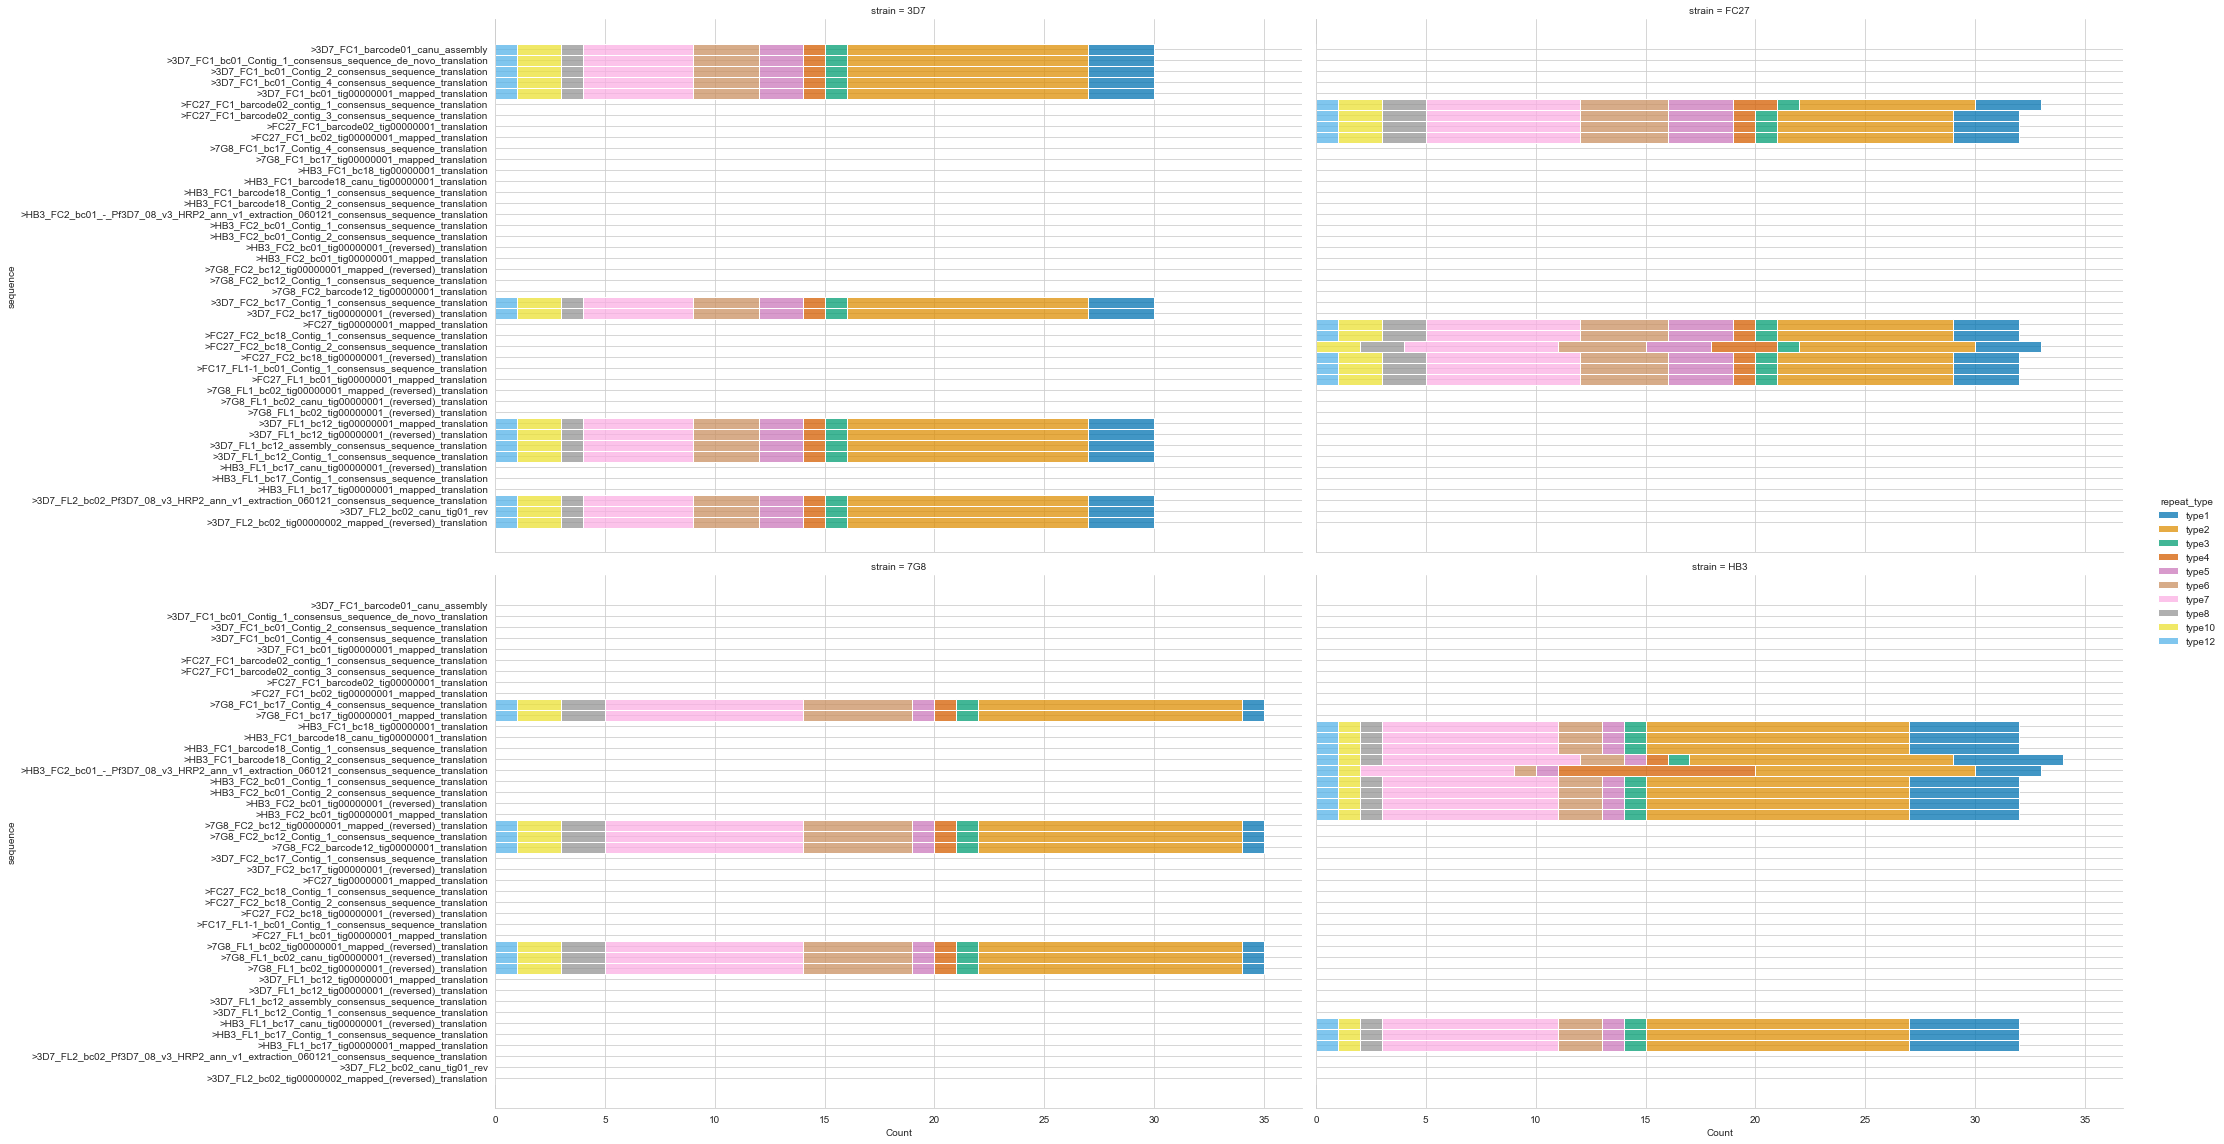

In [52]:
## Create a stacked histogram plot with each color representing a repeat type
g = sns.displot(master, y="sequence", hue="repeat_type", col="strain", 
                col_wrap=2, height=8, aspect=15/8, multiple="stack", kind="hist", discrete=True, palette="colorblind")
plt.savefig("output/figure_4.png")
plt.savefig("output/figure_4.svg")

## Figure 5

__PacBio repeat types__


In [7]:
## Create a master data frame of all PacBio repeat type tables

master = pd.concat([fc2_pac_bc02_H038_uncount, fc2_pac_bc02_H038_pb_uncount, fc2_pac_bc12_H091_uncount,
                   fc2_pac_bc12_H091_pb_uncount, fc2_pac_bc13_H478_uncount, fc2_pac_bc13_H478_pb_uncount,
                   fc2_pac_bc30_U400_uncount, fc2_pac_bc30_U400_pb_uncount, fc3_pac_bc60_5809_uncount,
                   fc3_pac_bc60_5809_pb_uncount, fc3_pac_bc01_5812_uncount, fc3_pac_bc01_5812_pb_uncount,
                   fc3_pac_bc02_5817_uncount, fc3_pac_bc02_5817_pb_uncount, fc3_pac_bc52_U830_uncount,
                   fc3_pac_bc52_U830_pb_uncount, fc3_pac_bc17_5701_uncount, fc3_pac_bc17_5701_pb_uncount])

master.drop('index', axis=1, inplace=True)

master = master.reset_index()

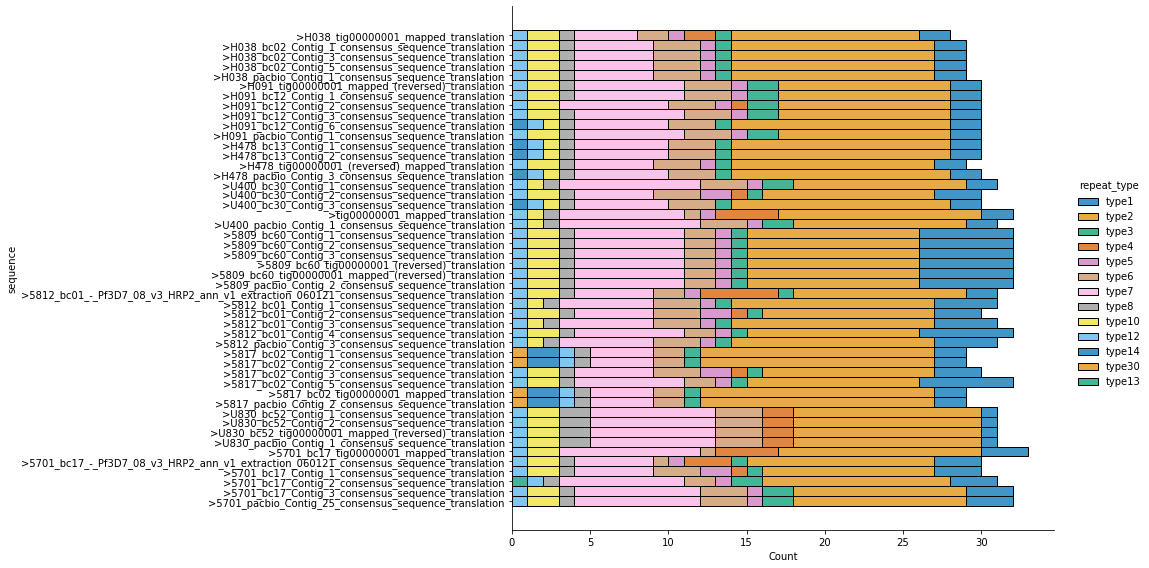

In [8]:
g = sns.displot(master, y="sequence", hue="repeat_type", multiple="stack", kind="hist", discrete=True,
                height=8, aspect=15/8, palette="colorblind")
plt.savefig("output/figure_5.png")
plt.savefig("output/figure_5.svg")

## Supplementary Figure 3

__Barcoding test read counts__


In [ ]:
# Plot barcode distribution within FC3
FC3_k13_plot = sns.catplot(data=fc3_k13_filt, x="barcode", y="barcode_read_count", kind="bar").set(title="FC3_k13")
plt.savefig("output/supplementary_figure_3a.png")
plt.savefig("output/supplementary_figure_3a.svg")


In [ ]:
# Plot barcode distribution within FC1
FC1_bct_plot = sns.catplot(data=fc1_bct_filt, x="barcode", y="barcode_read_count", kind="bar").set(title="FC1_hrp2 (barcoding test)")
plt.savefig("output/supplementary_figure_3b.png")
plt.savefig("output/supplementary_figure_3b.svg")


## Supplementary Figure 4

__Median coverage of Dd2 on *pfhrp2* vs. Total passing read count per sequencing run__


In [ ]:
## Calculate the total passing reads in each sequencing run by getting the length of the filtered dataframe

# MR4

fc1_mr4_len = len(fc1_mr4_filt)
fc2_mr4_len = len(fc2_mr4_filt)
fl1_mr4_len = len(fl1_mr4_filt)
fl2_mr4_len = len(fl2_mr4_filt)

# TES

fl1_tes_len = len(fl1_tes_filt)
fl2_tes_len = len(fl2_tes_filt)
fl3_tes_len = len(fl3_tes_filt)
fl4_tes_len = len(fl4_tes_filt)
fl5_tes_len = len(fl5_tes_filt)
fl6_tes_len = len(fl6_tes_filt)

# PacBio

fl1_pac_len = len(fl1_pac_filt)
fl2_pac_len = len(fl2_pac_filt)
fc1_pac_len = len(fc1_pac_filt)
fc2_pac_len = len(fc2_pac_filt)
fc3_pac_len = len(fc3_pac_filt)
fc4_pac_len = len(fc4_pac_filt)
fc5_pac_len = len(fc5_pac_filt)

# Remaining field samples
fl1_field_len = len(fl1_field_filt)
fl2_field_len = len(fl2_field_filt)
fc1_field_len = len(fc1_field_filt)
fc2_field_len = len(fc2_field_filt)
fc3_field_len = len(fc3_field_filt)
fc4_field_len = len(fc4_field_filt)
fc5_field_len = len(fc5_field_filt)
fc6_field_len = len(fc6_field_filt)
fc7_field_len = len(fc7_field_filt)
fc8_field_len = len(fc8_field_filt)
fc9_field_len = len(fc9_field_filt)



tab = pd.DataFrame({'run':['FL1_TES', 'FL2_TES', 'FL3_TES', 'FL4_TES', 'FL5_TES', 'FL6_TES', 'FC2_pac', 'FC3_pac', 'FC4_pac', 'FC5_pac', 'FL1_pac', 'FL2_pac', 'FC1_field', 'FC2_field', 'FC3_field', 'FC4_field', 'FC5_field', 'FC6_field', 'FC7_field', 'FC8_field', 'FC9_field', 'FL1_field', 'FL2_field'],
                   'med_coverage':[7, 7, 7, 6, 1, 7, 67, 27, 20, 24, 0, 20, 59, 45, 31, 80, 28, 18, 237, 27, 59, 3, 1],
                   'total_reads':[fl1_tes_len, fl2_tes_len, fl3_tes_len, fl4_tes_len, fl5_tes_len, fl6_tes_len, fc2_pac_len, fc3_pac_len, fc4_pac_len, fc5_pac_len, fl1_pac_len, fl2_pac_len, fc1_field_len, fc2_field_len, fc3_field_len, fc4_field_len, fc5_field_len, fc6_field_len, fc7_field_len, fc8_field_len, fc9_field_len, fl1_field_len, fl2_field_len]})



In [ ]:
sns.lmplot(data=tab, x="med_coverage", y="total_reads", ci=None, scatter_kws={"s": 50, "alpha": 1})
plt.savefig("output/supplementary_figure4.png")
plt.savefig("output/supplementary_figure4.svg")

## Supplementary Figure 5

__Positivity threshold plots for PacBio and other field validation samples__


In [ ]:
## Reorganize data into a dataframe that will serve this figure

unclassified = ["unclassified"]     # Write "unclassified" to its own list. This is helpful when defining "total_class" and there's probably a better way to do it in the "total_class" code.

## PacBio dataframe construction

# FC2 PacBio

bc52 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode52"])
bc60 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode60"])
bc02 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode30"])
bc17 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc2_pac_filt[fc2_pac_filt.barcode_arrangement == "barcode18"])


fc2_pac_tab = pd.DataFrame({'barcode':['barcode52', 'barcode60', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode17', 'barcode01', 'barcode18'],
            'sample_ID':['3D7_pos', 'Dd2_neg', 'H038', 'H091', 'H478', 'U097', 'U400', 'U798', 'U937', 'U992'],
            'med_coverage':[2819, 67, 756, 1972, 726, 779, 446, 260, 302, 213],
            'mean_coverage':[3246, 73.4, 798.5, 2157.6, 798.6, 823.2, 445.7, 278.9, 324.7, 241.6],
            'pacbio_pos-neg':['control', 'control', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos'],
            'sanger_pos-neg':['control', 'control', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg'],
            'control-sample':['control', 'control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample'],
            'run':["FC2_pacbio"] * 10,
            'barcode_read_count': [bc52, bc60, bc02, bc12, bc13, bc49, bc30, bc17, bc01, bc18]})

# FC3 PacBio

bc52 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode52"])
bc60 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode60"])
bc02 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode30"])
bc17 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc3_pac_filt[fc3_pac_filt.barcode_arrangement == "barcode18"])

fc3_pac_tab = pd.DataFrame({'barcode':['barcode52', 'barcode60', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode17', 'barcode01', 'barcode18'],
            'sample_ID':['U830', '5809', '5817', '5694', '5708', '3D7_pos', 'Dd2_neg', '5701', '5812', '5795'],
            'med_coverage':[1107, 668, 876, 2435, 205, 2750, 27, 709, 1206, 542],
            'mean_coverage':[1163, 842, 953.4, 2702.1, 237.9, 3194.1, 32, 808, 1399.9, 606.9],
            'pacbio_pos-neg':['pos', 'pos', 'pos', 'pos', 'pos', 'control', 'control', 'pos', 'pos', 'pos'],
            'sanger_pos-neg':['pos', 'pos', 'pos', 'pos', 'pos', 'control', 'control', 'pos', 'pos', 'pos'],
            'control-sample':['sample', 'sample', 'sample', 'sample', 'sample', 'control', 'control', 'sample', 'sample', 'sample'],
            'run':["FC3_pacbio"] * 10,
            'barcode_read_count': [bc52, bc60, bc02, bc12, bc13, bc49, bc30, bc17, bc01, bc18]})

# FC4 PacBio

bc52 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode52"])
bc60 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode60"])
bc02 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode30"])
bc17 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc4_pac_filt[fc4_pac_filt.barcode_arrangement == "barcode18"])


fc4_pac_tab = pd.DataFrame({'barcode':['barcode52', 'barcode60', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode17', 'barcode01', 'barcode18'],
            'sample_ID':['5721', '5881', '5830', '3D7_pos', 'Dd2_neg', '5690', '5761', '5802', '5718', '5884'],
            'med_coverage':[849, 469, 912, 2430, 20, 691, 3032, 1095, 398, 495],
            'mean_coverage':[893.4, 480.3, 940.6, 2871.3, 22.5, 744.7, 3118.3, 1118.9, 417.4, 516.8],
            'pacbio_pos-neg':['pos', 'pos', 'pos', 'control', 'control', 'pos', 'pos', 'pos', 'pos', 'pos'],
            'sanger_pos-neg':['pos', 'pos', 'pos', 'control', 'control', 'pos', 'pos', 'pos', 'pos', 'pos'],
            'control-sample':['sample', 'sample', 'sample', 'control', 'control', 'sample', 'sample', 'sample', 'sample', 'sample'],
            'run':["FC4_pacbio"] * 10,
            'barcode_read_count': [bc52, bc60, bc02, bc12, bc13, bc49, bc30, bc17, bc01, bc18]})

# FC5 PacBio

bc52 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode52"])
bc60 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode60"])
bc02 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode30"])
bc17 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc5_pac_filt[fc5_pac_filt.barcode_arrangement == "barcode18"])

fc5_pac_tab = pd.DataFrame({'barcode':['barcode52', 'barcode60', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode17', 'barcode01', 'barcode18'],
            'sample_ID':['25d', '26d', 'Dd2_neg', '5776', '5873', '8d', '9d', '27d', '33d', '3D7_pos'],
            'med_coverage':[1363, 1810, 24, 1060, 558, 446, 806, 1817, 2054, 803],
            'mean_coverage':[1411.6, 1895.4, 29.1, 1119.6, 576.7, 473.7, 862, 1902.5, 2554.2, 910.1],
            'pacbio_pos-neg':['pos', 'pos', 'control', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'control'],
            'sanger_pos-neg':['pos', 'pos', 'control', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'control'],
            'run':["FC5_pacbio"] * 10,
            'control-sample':['sample', 'sample', 'control', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
            'barcode_read_count': [bc52, bc60, bc02, bc12, bc13, bc49, bc30, bc17, bc01, bc18]})

# Fl1 PacBio

bc01 = len(fl1_pac_filt[fl1_pac_filt.barcode_arrangement == "barcode01"])
bc02 = len(fl1_pac_filt[fl1_pac_filt.barcode_arrangement == "barcode02"])
bc12 = len(fl1_pac_filt[fl1_pac_filt.barcode_arrangement == "barcode12"])
bc17 = len(fl1_pac_filt[fl1_pac_filt.barcode_arrangement == "barcode17"])
bc18 = len(fl1_pac_filt[fl1_pac_filt.barcode_arrangement == "barcode18"])

fl1_pac_tab = pd.DataFrame({'run':['FL1_pacbio'] * 5, 
                    'barcode':['barcode01', 'barcode02', 'barcode12', 'barcode17', 'barcode18'], 
                    'med_coverage':[62, 111, 0, 6, 65],
                    'mean_coverage':[75.3, 287.8, 0.8, 8.2, 71],
                    'sample_ID':['U221','7G8','Dd2','H368','U414'],
                    'pacbio_pos-neg':['neg', 'control', 'control', 'neg', 'pos'],
                    'sanger_pos-neg':['pos', 'control', 'control', 'neg', 'pos'],
                    'control-sample':['sample', 'control', 'control', 'sample', 'sample'],
                    'barcode_read_count': [bc01, bc02, bc12, bc17, bc18]})

# FL2 PacBio

bc13 = len(fl2_pac_filt[fl2_pac_filt.barcode_arrangement == "barcode13"])
bc18 = len(fl2_pac_filt[fl2_pac_filt.barcode_arrangement == "barcode18"])
bc02 = len(fl2_pac_filt[fl2_pac_filt.barcode_arrangement == "barcode02"])
bc12 = len(fl2_pac_filt[fl2_pac_filt.barcode_arrangement == "barcode12"])
bc49 = len(fl2_pac_filt[fl2_pac_filt.barcode_arrangement == "barcode49"])

fl2_pac_tab = pd.DataFrame({'run':['FL2_pacbio'] * 5, 
                        'barcode':['barcode13', 'barcode18', 'barcode02', 'barcode12', 'barcode49'],
                        'sample_ID':['3D7_pos', '50d', '86d', '89d', 'Dd2_neg'],
                        'med_coverage':[175, 118, 186, 151, 20],
                        'mean_coverage':[203.8, 122.5, 195.3, 160.3, 22.5],
                        'pacbio_pos-neg':['control', 'pos', 'pos', 'pos', 'control'],
                        'sange_pos-neg':['control', 'pos', 'pos', 'pos', 'control'],
                        'control-sample':['control', 'sample', 'sample', 'sample', 'control'],
                        'barcode_read_count':[bc13, bc18, bc02, bc12, bc49]})



In [ ]:
## Validation dataframe construction

# FC1 Remaining field samples

# Write barcode read counts to a variable
bc52 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode52"])
bc17 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode30"])
bc60 = len(fc1_field_filt[fc1_field_filt.barcode_arrangement == "barcode60"])


# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fc1_field_tab = pd.DataFrame({'barcode':['barcode52', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode60'],
                       'sample_ID':['3D7_pos', 'd69', 'd74', 'd79', 'd81', 'd84', 'd85', 'd87', 'd88', 'Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[4847, 1530, 3679, 784, 3409, 6788, 429, 304, 2313, 59],
                       'mean_coverage':[6196.3, 2298.2, 3758.5, 947.6, 3737.9, 7508.1, 438.5, 353.4, 2659.4, 63.6],
                       'run':['FC1_field'] * 10,
                       'barcode_read_count':[bc52, bc17, bc01, bc18, bc02, bc12, bc13, bc49, bc30, bc60]})



# FC2 Remaining field samples

# Write barcode read counts to a variable
bc52 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode52"])
bc17 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode30"])
bc60 = len(fc2_field_filt[fc2_field_filt.barcode_arrangement == "barcode60"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fc2_field_tab = pd.DataFrame({'barcode':['barcode52', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode60'],
                       'sample_ID':['3D7_pos', 'd90', 'd94', 'd121', 'd122', 'd123', 'd124', 'd125', 'd126', 'Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[5183, 11863, 2454, 11, 13, 16, 111, 238, 22, 45],
                       'mean_coverage':[6728, 15749.6, 2632.4, 12.4, 13.6, 19.7, 137.1, 288.3, 24.2, 50],
                       'run':['FC2_valdom'] * 10,
                       'barcode_read_count':[bc52, bc17, bc01, bc18, bc02, bc12, bc13, bc49, bc30, bc60]})

# FC3 

# Write barcode read counts to a variable
bc52 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode52"])
bc17 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode30"])
bc60 = len(fc3_field_filt[fc3_field_filt.barcode_arrangement == "barcode60"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fc3_field_tab = pd.DataFrame({'barcode':['barcode52', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode60'],
                       'sample_ID':['3D7_pos', 'd127', 'd128', 'd131', 'd132', 'd133', 'd135', 'd136', 'd137', 'Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[10259 , 302, 125, 17, 18, 19, 72, 1023, 12, 31],
                       'mean_coverage':[ 13175.9, 361.3, 150.4, 18.2, 19.1, 23.4, 87.2, 1209.7, 14.8, 35.7],
                       'run':['FC3_valdom'] * 10,
                       'barcode_read_count':[bc52, bc17, bc01, bc18, bc02, bc12, bc13, bc49, bc30, bc60]})

# FC4

# Write barcode read counts to a variable
bc52 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode52"])
bc17 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode30"])
bc60 = len(fc4_field_filt[fc4_field_filt.barcode_arrangement == "barcode60"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fc4_field_tab = pd.DataFrame({'barcode':['barcode52', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode60'],
                       'sample_ID':['3D7_pos', 'd139', '5689', '5700','5722', '5725', '5766', '5767', '5797', 'Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[4119, 62, 202, 1598.0, 10707, 331, 249, 2860, 3827, 80],
                       'mean_coverage':[5454.7, 71.8, 228.9, 2129.3, 11614.8, 343, 309.6, 2754.1, 5643, 89],
                       'run':['FC4_valdom'] * 10,
                       'barcode_read_count':[bc52, bc17, bc01, bc18, bc02, bc12, bc13, bc49, bc30, bc60]})

# FC5

# Write barcode read counts to a variable
bc52 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode52"])
bc17 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode30"])
bc60 = len(fc5_field_filt[fc5_field_filt.barcode_arrangement == "barcode60"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fc5_field_tab = pd.DataFrame({'barcode':['barcode52', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode60'],
                       'sample_ID':['3D7_pos', '5798', '5816', '5834', '5852', '5874', '5888', '5889', '16-243', 'Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[4881, 3835, 505, 103, 1586, 18, 2059, 9003, 177, 28],
                       'mean_coverage':[5720.1, 4072.5, 614.2, 120, 1726.3, 22.7, 2182.9, 9284.6, 187.5, 29.7],
                       'run':['FC5_valdom'] * 10,
                       'barcode_read_count':[bc52, bc17, bc01, bc18, bc02, bc12, bc13, bc49, bc30, bc60]})

# FC6

# Write barcode read counts to a variable
bc52 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode52"])
bc17 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode30"])
bc60 = len(fc6_field_filt[fc6_field_filt.barcode_arrangement == "barcode60"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fc6_field_tab = pd.DataFrame({'barcode':['barcode52', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode60'],
                       'sample_ID':['3D7_pos', '17-010', '17-025', '17-035', '17-038', '17-151', '17-164', '17-167B', '17-174','Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[4511, 474, 30, 10, 24, 833, 1134, 132, 5330, 18],
                       'mean_coverage':[5201.6, 515, 36.7, 12.3, 26.3, 929.6, 1202, 144.4, 5439, 19.2],
                       'run':['FC6_valdom'] * 10,
                       'barcode_read_count':[bc52, bc17, bc01, bc18, bc02, bc12, bc13, bc49, bc30, bc60]})

# FC7

# Write barcode read counts to a variable
bc52 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode52"])
bc17 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode30"])
bc60 = len(fc7_field_filt[fc7_field_filt.barcode_arrangement == "barcode60"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fc7_field_tab = pd.DataFrame({'barcode':['barcode52', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode60'],
                       'sample_ID':['3D7_pos', '17-175', '17-177', '17-178', '17-182', '17-184', '17-185', '17-186', '17-187','Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[4560, 675, 3891, 2649, 2096, 851, 531, 2048, 6961, 237],
                       'mean_coverage':[5374.2, 846.4, 4391.7, 2795.8, 2657.9, 1042.7, 594.8, 2555.1, 7940.9, 252.7],
                       'run':['FC7_valdom'] * 10,
                       'barcode_read_count':[bc52, bc17, bc01, bc18, bc02, bc12, bc13, bc49, bc30, bc60]})


# FC8

# Write barcode read counts to a variable
bc52 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode52"])
bc17 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode30"])
bc60 = len(fc8_field_filt[fc8_field_filt.barcode_arrangement == "barcode60"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fc8_field_tab = pd.DataFrame({'barcode':['barcode52', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode60'],
                       'sample_ID':['3D7_pos', '17-191', '17-194', '17-200', '17-202', '17-206', '17-205', '3d', 'd11','Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[1019, 2126, 2254, 353, 183, 1073, 2046, 2331, 4024, 27],
                       'mean_coverage':[1305, 2303.1, 2862.9, 413, 180.7, 1136.7, 2309.5, 2726, 4885.6, 29.7],
                       'run':['FC3_valdom'] * 10,
                       'barcode_read_count':[bc52, bc17, bc01, bc18, bc02, bc12, bc13, bc49, bc30, bc60]})

# FC9

# Write barcode read counts to a variable
bc52 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode52"])
bc17 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode13"])
bc49 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode49"])
bc30 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode30"])
bc60 = len(fc9_field_filt[fc9_field_filt.barcode_arrangement == "barcode60"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fc9_field_tab = pd.DataFrame({'barcode':['barcode52', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode49', 'barcode30', 'barcode60'],
                       'sample_ID':['3D7_pos', 'd15', 'd18', 'd20', 'd23', 'd24', 'd29', 'd34', 'd35', 'Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[7166, 405, 3654, 6948, 2626, 833, 29, 4292, 1049, 59],
                       'mean_coverage':[9561.7, 425.4, 4546.2, 7932.9, 3185.1, 969.1, 34.5, 4703.1, 1237.7, 64.2],
                       'run':['FC9_valdom'] * 10,
                       'barcode_read_count':[bc52, bc17, bc01, bc18, bc02, bc12, bc13, bc49, bc30, bc60]})

# FL1

# Write barcode read counts to a variable

bc49 = len(fl1_field_filt[fl1_field_filt.barcode_arrangement == "barcode49"])
bc17 = len(fl1_field_filt[fl1_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fl1_field_filt[fl1_field_filt.barcode_arrangement == "barcode01"])
bc18 = len(fl1_field_filt[fl1_field_filt.barcode_arrangement == "barcode18"])
bc02 = len(fl1_field_filt[fl1_field_filt.barcode_arrangement == "barcode02"])
bc12 = len(fl1_field_filt[fl1_field_filt.barcode_arrangement == "barcode12"])
bc13 = len(fl1_field_filt[fl1_field_filt.barcode_arrangement == "barcode13"])
bc30 = len(fl1_field_filt[fl1_field_filt.barcode_arrangement == "barcode30"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fl1_field_tab = pd.DataFrame({'barcode':['barcode49', 'barcode17', 'barcode01', 'barcode18', 'barcode02', 'barcode12', 'barcode13', 'barcode30'],
                       'sample_ID':['3D7_pos', 'd37', 'd38', 'd42', 'd47', 'd48', 'd52','Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[967, 3, 138, 334, 385, 1225, 973, 307],
                       'mean_coverage':[1186.3, 2.8, 141.7, 379.3, 424.3, 1546, 1153.2, 329.9],
                       'run':['FL1_valdom'] * 8,
                       'barcode_read_count':[bc49, bc17, bc01, bc18, bc02, bc12, bc13, bc30]})

# FL2

# Write barcode read counts to a variable

bc18 = len(fl2_field_filt[fl2_field_filt.barcode_arrangement == "barcode18"])
bc52 = len(fl2_field_filt[fl2_field_filt.barcode_arrangement == "barcode52"])
bc60 = len(fl2_field_filt[fl2_field_filt.barcode_arrangement == "barcode60"])
bc17 = len(fl2_field_filt[fl2_field_filt.barcode_arrangement == "barcode17"])
bc01 = len(fl2_field_filt[fl2_field_filt.barcode_arrangement == "barcode01"])
bc02 = len(fl2_field_filt[fl2_field_filt.barcode_arrangement == "barcode02"])

# Write a data frame containing 'barcode', 'sample_ID', 'control-sample', 'med_coverage', 'run',
#   'barcode_read_count', 'unclassified_read_count', 'true_classified_read_count',
#   'total_classified_read_count', 'total_reads', and 'type' (as in the type of 
#   basecalling/demultiplexing).

fl2_field_tab = pd.DataFrame({'barcode':['barcode18', 'barcode52', 'barcode60', 'barcode17', 'barcode01', 'barcode02'],
                       'sample_ID':['3D7_pos', 'd55', 'd57', 'd58', 'd66', 'Dd2_neg'],
                       'control-sample':['control', 'sample', 'sample', 'sample', 'sample', 'control'],
                       'med_coverage':[848, 57, 362, 618, 1043, 1],
                       'mean_coverage':[1055, 59.3, 414.8, 689.7, 1288.2, 1.2],
                       'run':['FL2_valdom'] * 6,
                       'barcode_read_count':[bc18, bc52, bc60, bc17, bc01, bc02]})

In [ ]:
# Calculate octiles between negative and positive controls for each sequencing run

# Order each separate table by the "control-sample" variable
fc2_pac_tab['control-sample'] = pd.Categorical(fc2_pac_tab['control-sample'], ['control', 'sample'], ordered=True)
fc3_pac_tab['control-sample'] = pd.Categorical(fc3_pac_tab['control-sample'], ['control', 'sample'], ordered=True)
fc4_pac_tab['control-sample'] = pd.Categorical(fc4_pac_tab['control-sample'], ['control', 'sample'], ordered=True)
fc5_pac_tab['control-sample'] = pd.Categorical(fc5_pac_tab['control-sample'], ['control', 'sample'], ordered=True)
fl1_pac_tab['control-sample'] = pd.Categorical(fl1_pac_tab['control-sample'], ['control', 'sample'], ordered=True)
fl2_pac_tab['control-sample'] = pd.Categorical(fl2_pac_tab['control-sample'], ['control', 'sample'], ordered=True)

fc1_field_tab['control-sample'] = pd.Categorical(fc1_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fc2_field_tab['control-sample'] = pd.Categorical(fc2_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fc3_field_tab['control-sample'] = pd.Categorical(fc3_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fc4_field_tab['control-sample'] = pd.Categorical(fc4_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fc5_field_tab['control-sample'] = pd.Categorical(fc5_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fc6_field_tab['control-sample'] = pd.Categorical(fc6_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fc7_field_tab['control-sample'] = pd.Categorical(fc7_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fc8_field_tab['control-sample'] = pd.Categorical(fc8_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fc9_field_tab['control-sample'] = pd.Categorical(fc9_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fl1_field_tab['control-sample'] = pd.Categorical(fl1_field_tab['control-sample'], ['control', 'sample'], ordered=True)
fl2_field_tab['control-sample'] = pd.Categorical(fl2_field_tab['control-sample'], ['control', 'sample'], ordered=True)

# Find the indices of the positive and negative controls and write to list
fc2_pac_control_idx = fc2_pac_tab.index[fc2_pac_tab['control-sample']=='control'].tolist()
fc3_pac_control_idx = fc3_pac_tab.index[fc3_pac_tab['control-sample']=='control'].tolist()
fc4_pac_control_idx = fc4_pac_tab.index[fc4_pac_tab['control-sample']=='control'].tolist()
fc5_pac_control_idx = fc5_pac_tab.index[fc5_pac_tab['control-sample']=='control'].tolist()
fl1_pac_control_idx = fl1_pac_tab.index[fl1_pac_tab['control-sample']=='control'].tolist()
fl2_pac_control_idx = fl2_pac_tab.index[fl2_pac_tab['control-sample']=='control'].tolist()

fc1_field_control_idx = fc1_field_tab.index[fc1_field_tab['control-sample']=='control'].tolist()
fc2_field_control_idx = fc2_field_tab.index[fc2_field_tab['control-sample']=='control'].tolist()
fc3_field_control_idx = fc3_field_tab.index[fc3_field_tab['control-sample']=='control'].tolist()
fc4_field_control_idx = fc4_field_tab.index[fc4_field_tab['control-sample']=='control'].tolist()
fc5_field_control_idx = fc5_field_tab.index[fc5_field_tab['control-sample']=='control'].tolist()
fc6_field_control_idx = fc6_field_tab.index[fc6_field_tab['control-sample']=='control'].tolist()
fc7_field_control_idx = fc7_field_tab.index[fc7_field_tab['control-sample']=='control'].tolist()
fc8_field_control_idx = fc8_field_tab.index[fc8_field_tab['control-sample']=='control'].tolist()
fc9_field_control_idx = fc9_field_tab.index[fc9_field_tab['control-sample']=='control'].tolist()
fl1_field_control_idx = fl1_field_tab.index[fl1_field_tab['control-sample']=='control'].tolist()
fl2_field_control_idx = fl2_field_tab.index[fl2_field_tab['control-sample']=='control'].tolist()

# FC2 PacBio

# Calculate the lowest octile between the coverages of negative and positive controls.
# If either control has a median coverage of zero, a message will appear, and if the negative
#   control is zero, the octile will be based on the median coverage of the positive control.''

print('FC2 PacBio calculation')
if (fc2_pac_tab.loc[fc2_pac_control_idx[0], 'med_coverage'])==0: 
    print("Median coverage of " + fc2_pac_tab.loc[fc2_pac_control_idx[0], 'sample_ID'] + " equals 0")
elif (fc2_pac_tab.loc[fc2_pac_control_idx[1], 'med_coverage'])==0:
    print("Median coveragee of " + fc2_pac_tab.loc[fc2_pac_control_idx[1], 'sample_ID'] + " equals 0")
    fc2_pac_oct1 = (fc2_pac_tab.loc[fl2_pac_control_idx[0], 'med_coverage'])/8
else:
    fc2_pac_oct1 = (((fc2_pac_tab.loc[fc2_pac_control_idx[0], 'med_coverage'])+(fc2_pac_tab.loc[fc2_pac_control_idx[1], 'med_coverage']))/8)+(fc2_pac_tab.loc[fc2_pac_control_idx[1], 'med_coverage'])
print("Set FC2 refline at ", fc2_pac_oct1)

# Find indices of all experimental samples
fc2_pac_sample_idx = fc2_pac_tab.index[fc2_pac_tab['control-sample']!='control'].tolist()

if fc2_pac_sample_idx!=0:
    print("Putative positivies: ")
    for i in fc2_pac_sample_idx:
        if (fc2_pac_tab.loc[i, 'med_coverage']) >= fc2_pac_oct1:
            print(fc2_pac_tab.loc[i, 'sample_ID'])
    print("")
    print("Putative negatives")
    for i in fc2_pac_sample_idx:
        if (fc2_pac_tab.loc[i, 'med_coverage'])<fc2_pac_oct1:
            print(fc2_pac_tab.loc[i, 'sample_ID'])
else:
    print("No samples in list, please check dataframe.")
    
print("")   # Give yourself some space
print("")

# FC3 PacBio

# Calculate the lowest octile between the coverages of negative and positive controls.
# If either control has a median coverage of zero, a message will appear, and if the negative
#   control is zero, the octile will be based on the median coverage of the positive control.''

print('FC3 PacBio calculation')
if (fc3_pac_tab.loc[fc3_pac_control_idx[0], 'med_coverage'])==0:
    print("Median coverage of " + fc3_pac_tab.loc[fc3_pac_control_idx[0], 'sample_ID'] + " equals 0")
elif (fc3_pac_tab.loc[fc3_pac_control_idx[1], 'med_coverage'])==0:
    print("Median coverage of " + fc3_pac_tab.loc[fc3_pac_control_idx[1], 'sample_ID'] + " equals 0")
    fc3_pac_oct1 = (fc3_pac_tab.loc[fc3_pac_control_idx[0], 'med_coverage'])/8
else:
    fc3_pac_oct1 = (((fc3_pac_tab.loc[fc3_pac_control_idx[0], 'med_coverage']) + (fc3_pac_tab.loc[fc3_pac_control_idx[1], 'med_coverage']))/8)+(fc3_pac_tab.loc[fc3_pac_control_idx[1], 'med_coverage'])
print("Set FC3 refline at ", fc3_pac_oct1)

# Find indices of all experimental samples
fc3_pac_sample_idx = fc3_pac_tab.index[fc3_pac_tab['control-sample']!='control'].tolist()

# List out the experimental samples that fall above or below the first octile threshold
if fc3_pac_sample_idx!=0:   # If there are non-control samples in the sequencing run
    print("Putative positives: ")
    for i in fc3_pac_sample_idx:   # For each index in the experimental sample index list, check each one to see if its coverage is equal to or greater than the octile.
        if (fc3_pac_tab.loc[i, 'med_coverage']) >= fc3_pac_oct1:   # If the sample's coverage is equivalent to or greater than the octile, print the sample ID in the putative positives list.
            print(fc3_pac_tab.loc[i, 'sample_ID'])
    print("")
    print("Putative negatives: ")
    for i in fc3_pac_sample_idx:   # For each index in the experimental sample index list, check each one to see if its coverage is less than the octile.
        if (fc3_pac_tab.loc[i, 'med_coverage']) < fc3_pac_oct1:   # If the sample's coverage is less than the octile, print the sample ID in the putative negatives list.
            print(fc3_pac_tab.loc[i, 'sample_ID'])
else:
    print("No samples in list, please check dataframe.")   # If there are zero values in the list of experimental sample indices, provide a message to double check the original data frame.
    
print("")   # Give yourself some space.
print("")

# FC4 PacBio

# Calculate the lowest octile between the coverages of negative and positive controls.
# If either control has a median coverage of zero, a message will appear, and if the negative
#   control is zero, the octile will be based on the median coverage of the positive control.''

print('FC4 PacBio calculation')
if (fc4_pac_tab.loc[fc4_pac_control_idx[0], 'med_coverage'])==0:
    print("Median coverage of " + fc4_pac_tab.loc[fc4_pac_control_idx[0], 'sample_ID'] + " equals 0")
elif (fc4_pac_tab.loc[fc4_pac_control_idx[1], 'med_coverage'])==0:
    print("Median coverage of " + fc4_pac_tab.loc[fc4_pac_control_idx[1], 'sample_ID'] + " equals 0")
    fc4_pac_oct1 = (fc4_pac_tab.loc[fc4_pac_control_idx[0], 'med_coverage'])/8
else:
    fc4_pac_oct1 = (((fc4_pac_tab.loc[fc4_pac_control_idx[0]])))